# Housing Price Prediction

# Problem Statement

Assignment Part-I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## ---------------------------------------------------------------------------------------------------------------

# Step 1 : Read, Explore and Understand The Data

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
## To Suppress any warnings
import warnings
warnings.filterwarnings("ignore")

In [136]:
## remove the display limit to see all row and column data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [137]:
# reading data from csv file
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [138]:
## Rows and Columns Count
print("Number of Rows = ", data.shape[0])
print("Number of Columns = ", data.shape[1])

Number of Rows =  1460
Number of Columns =  81


In [139]:
## Column list
cols=data.columns
cols

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### From the sample display we can tell that some of the data columns contains null values
### We will try to find the percent of null values in each columns

## ___________________________________________________________________________

## Step 2 : Data formating, Outlier Checking & Replacing null value with suitable value.

In [140]:
null_percent = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False)
null_percent

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
Functional       0.00
Fireplaces       0.00
KitchenQual      0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
TotRmsAbvGrd     0.00
GarageCars       0.00
GrLivArea        0.00
GarageArea       0.00
PavedDrive       0.00
WoodDeckSF       0.00
OpenPorchSF      0.00
EnclosedPorch    0.00
3SsnPorch        0.00
ScreenPorch      0.00
PoolArea         0.00
MiscVal          0.00
MoSold           0.00
YrSold           0.00
SaleType         0.00
SaleCondition    0.00
BsmtFullBath     0.00
HeatingQC 

## ___________________________________________________________________________

### Here we will be dropping columns with more than 40 % missing value as it will not be much of a help in analysis.

In [141]:
# Dropping Columns with high missing values ,above 40%

cols_drop=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']

In [142]:
data.drop(cols_drop,axis=1,inplace=True)

In [143]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


## ___________________________________________________________________________

### Now will check if any of the columns in the data set has constant value (All row has same value). Such columns can be removed as its will be of no use in analysis

In [144]:
unique_data_count=data.nunique()
unique_data_count

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

### We can see that non of the columns in the data frame has constant value so we are good to go ahead.

## ___________________________________________________________________________

### We will replace the column data with actual reference value for each understanding . Also we will try to replace null value in categorical data with suitable value

### For contineous data we will check if there are any outlier or not and based on that we will try to fill the null value with either mean or median

In [145]:
data['MSSubClass']=data['MSSubClass'].replace(
    {
        20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'
    })

In [146]:
data['MSZoning']=data['MSZoning'].replace(
    {
       'A':'Agriculture',
       'C':'Commercial',
       'FV':'Floating Village Residential',
       'I':'Industrial',
       'RH':'Residential High Density',
       'RL':'Residential Low Density',
       'RP':'Residential Low Density Park',
       'RM':'Residential Medium Density'
    })


In [147]:
data['Street']=data['Street'].replace(
    {
       'Grvl':'Gravel',
       'Pave':'Paved'
    })

In [148]:
data['LotShape']=data['LotShape'].replace(
    {
       'Reg':'Regular',
       'IR1':'Slightly irregular',
       'IR2':'Moderately Irregular',
       'IR3':'Irregular'
    })

In [149]:
#LandContour: Flatness of the property

       #Lvl	Near Flat/Level	
       #Bnk	Banked - Quick and significant rise from street grade to building
       #HLS	Hillside - Significant slope from side to side
       #Low	Depression
# for simplicity updated the actual detail of the column values
#Lvl	Level	
#Bnk	Banked
#HLS	Hillside
#Low	Depression

data['LandContour']=data['LandContour'].replace(
    {
        'Lvl':'Level',
        'Bnk':'Banked',
        'HLS':'Hillside',
        'Low':'Depression'
    })

In [150]:
data['OverallQual']=data['OverallQual'].replace(
    {        
       10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'
    })

In [151]:
data['OverallCond']=data['OverallCond'].replace(
    {        
       10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'
    })

In [152]:
data['ExterQual']=data['ExterQual'].replace(
    {        
       'Ex':'Excellent',
       'Gd':'Good',
       'TA':'Average/Typical',
       'Fa':'Fair',
       'Po':'Poor'
    })

In [153]:
data['ExterCond']=data['ExterCond'].replace(
    {        
       'Ex':'Excellent',
       'Gd':'Good',
       'TA':'Average/Typical',
       'Fa':'Fair',
       'Po':'Poor'
    })

In [154]:
data['BsmtQual']=data['BsmtQual'].replace(
    {        
       'Ex':'Excellent',
       'Gd':'Good',
       'TA':'Typical',
       'Fa':'Fair',
       'Po':'Poor',
       'NA':'No Basement'
    })
data['BsmtQual'].isna()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17       True
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39       True
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [155]:
data['BsmtCond']=data['BsmtCond'].replace(
    {        
       'Ex':'Excellent',
       'Gd':'Good',
       'TA':'Typical',
       'Fa':'Fair',
       'Po':'Poor',
       'NA':'No Basement'
    })

In [156]:
data['BsmtExposure']=data['BsmtExposure'].replace(
    {        
       'Gd':'Good Exposure',
       'Av':'Average Exposure',
       'Mn':'Mimimum Exposure',
       'No':'No Exposure',
       'NA':'No Basement'
    })

In [157]:
data['BsmtFinType1']=data['BsmtFinType1'].replace(
    {        
       'GLQ':'Good Living Quarters',
       'ALQ':'Average Living Quarters',
       'BLQ':'Below Average Living Quarters',
       'Rec':'Average Rec Room',
       'LwQ':'Low Quality',
       'Unf':'Unfinshed',
       'NA':'No Basement'
    })

In [158]:
data['BsmtFinType2']=data['BsmtFinType2'].replace(
    {        
       'GLQ':'Good Living Quarters',
       'ALQ':'Average Living Quarters',
       'BLQ':'Below Average Living Quarters',
       'Rec':'Average Rec Room',
       'LwQ':'Low Quality',
       'Unf':'Unfinshed',
       'NA':'No Basement'
    })

In [159]:
data['HeatingQC']=data['HeatingQC'].replace(
    {        
       'Ex':'Excellent',
       'Gd':'Good',
       'TA':'Typical',
       'Fa':'Fair',
       'Po':'Poor'
    })

In [160]:
data['CentralAir']=data['CentralAir'].replace(
    {        
       'N':'No',
       'Y':'Yes'
    })

In [161]:
data['KitchenQual']=data['KitchenQual'].replace(
    {        
       'Ex':'Excellent',
       'Gd':'Good',
       'TA':'Typical/Average',
       'Fa':'Fair',
       'Po':'Poor'
    })

In [162]:
data['Functional']=data['Functional'].replace(
    {     
       'Typ':'Typical Functionality',
       'Min1':'Minor Deductions 1',
       'Min2':'Minor Deductions 2',
       'Mod':'Moderate Deductions',
       'Maj1':'Major Deductions 1',
       'Maj2':'Major Deductions 2',
       'Sev':'Severely Damaged',
       'Sal':'Salvage only'
    })

In [163]:
data['GarageFinish']=data['GarageFinish'].replace(
    {
       'Fin':'Finished',
       'RFn':'Rough Finished',
       'Unf':'Unfinished',
       'NA':'No Garage'
    })
#later we found that there are some null value which we can replace with the No Garage value 
data['GarageFinish'] = data['GarageFinish'].replace(np.nan, 'No Garage')

In [164]:
data['GarageType']=data['GarageType'].replace(
    {
       '2Types':'More than one type of garage',
       'Attchd':'Attached to home',
       'Basment':'Basement Garage',
       'BuiltIn':'Built-In',
       'CarPort':'Car Port',
       'Detchd':'Detached from home',
       'NA':'No Garage'
    })

#later we found that there are some null value which we can replace with the No Garage value 
data['GarageType'] = data['GarageType'].replace(np.nan, 'No Garage')

In [165]:
    data['GarageCond']=data['GarageCond'].replace(
    {        
       'Ex':'Excellent',
       'Gd':'Good',
       'TA':'Typical/Average',
       'Fa':'Fair',
       'Po':'Poor',
       'NA':'No Garage'
    })
#later we found that there are some null value which we can replace with the No Garage value     
data['GarageCond'] = data['GarageCond'].replace(np.nan, 'No Garage')

In [166]:
    data['GarageQual']=data['GarageQual'].replace(
    {        
       'Ex':'Excellent',
       'Gd':'Good',
       'TA':'Typical/Average',
       'Fa':'Fair',
       'Po':'Poor',
       'NA':'No Garage'
    })
#later we found that there are some null value which we can replace with the No Garage value    
    data['GarageQual'] = data['GarageQual'].replace(np.nan, 'No Garage')

In [167]:
data['MasVnrType']=data['MasVnrType'].replace(
    {
       'BrkCmn':'Brick Common',
       'BrkFace':'Brick Face',
       'CBlock':'Cinder Block',
       'None':'None',
       'Stone':'Stone'
    })

In [168]:
data.groupby(['MasVnrType'])['MasVnrType'].count()

MasVnrType
Brick Common     15
Brick Face      445
None            864
Stone           128
Name: MasVnrType, dtype: int64

In [169]:
# replacing nan with the top option of this field
data['MasVnrType'] = data['MasVnrType'].replace(np.nan, 'None') 

In [170]:
data.groupby(['Electrical'])['Electrical'].count()

Electrical
FuseA      94
FuseF      27
FuseP       3
Mix         1
SBrkr    1334
Name: Electrical, dtype: int64

In [171]:
# Replacing nan value with most common value SBrkr    
data['Electrical'] = data['Electrical'].replace(np.nan, 'SBrkr')

In [172]:
#Other columns which has null value
data[['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']]=data[['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']].replace(np.nan, 'None')

In [173]:
(data.isnull().sum() / data.isnull().count()*100).sort_values(ascending = False).head()


LotFrontage   17.74
GarageYrBlt    5.55
MasVnrArea     0.55
Id             0.00
HalfBath       0.00
dtype: float64

In [174]:
data['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [175]:
# By checking the unique data it contains , we can say that the columns has some putlier value. so here we will try to replace
# the NaN value with median value

median_LotFrontage=data['LotFrontage'].median()
data.LotFrontage.fillna(median_LotFrontage,inplace=True)

#Check Update
print(median_LotFrontage)
data['LotFrontage'].unique()

69.0


array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  69.,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,  67.,
        83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144., 114.,
       128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,  46.])

In [176]:
data['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  69.,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,  67.,
        83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144., 114.,
       128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,  46.])

In [177]:
data['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [178]:
#Here we find the data to be ok with no outlier , so we will be replacing the null data with mean value 

median_GarageYrBlt=round(data['GarageYrBlt'].mean(),0)
data['GarageYrBlt'].fillna(median_GarageYrBlt,inplace=True)

print(median_GarageYrBlt)
data['GarageYrBlt'].unique()
#We are rounding the mean value to make is consistance with the other data

1979.0


array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953., 1979., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926., 1955.,
       1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924., 1996.,
       1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925., 1941.,
       2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [179]:
data['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [180]:
data['MasVnrArea'].describe()

count   1,452.00
mean      103.69
std       181.07
min         0.00
25%         0.00
50%         0.00
75%       166.00
max     1,600.00
Name: MasVnrArea, dtype: float64

In [181]:
# He we can see presence of outlier(difference between 75% amd 100% is very large) 
#So we will be using median to replace null values

median_MasVnrArea= data['MasVnrArea'].median()
data['MasVnrArea'].fillna(median_MasVnrArea,inplace=True)
print(median_MasVnrArea)

0.0


## ___________________________________________________________________________

In [182]:
#We can say from the problem statement that the dependent variable is the SalePrice. We will try to check the data within it 

In [183]:
data['SalePrice'].describe()

count     1,460.00
mean    180,921.20
std      79,442.50
min      34,900.00
25%     129,975.00
50%     163,000.00
75%     214,000.00
max     755,000.00
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

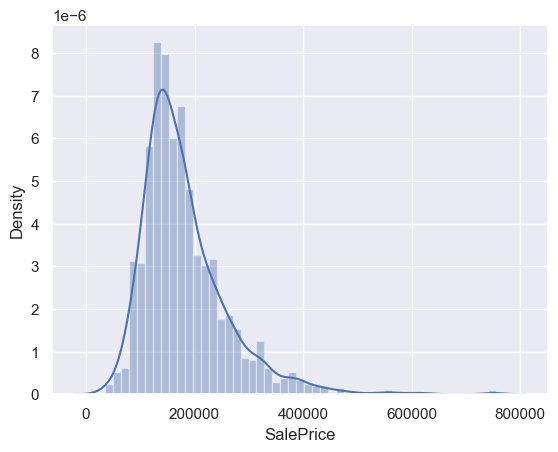

In [184]:
sns.distplot(data['SalePrice'])

In [185]:
# we can say that the data is not noramally distributed 
#skewness and kurtosis
print("Skewness: %f" % data['SalePrice'].skew())
data['SalePrice']=np.log(data.SalePrice)
data['SalePrice'].describe()

Skewness: 1.882876


count   1,460.00
mean       12.02
std         0.40
min        10.46
25%        11.78
50%        12.00
75%        12.27
max        13.53
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

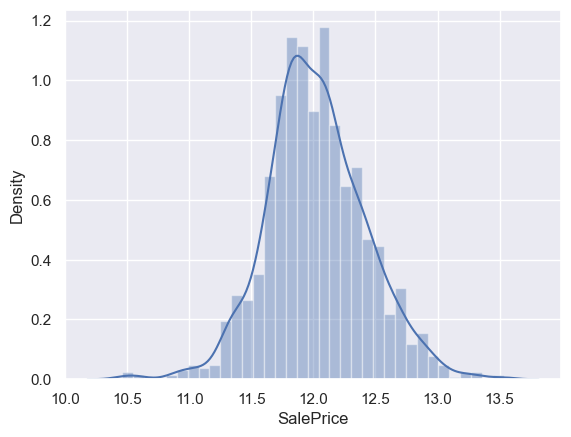

In [186]:
sns.distplot(data['SalePrice'])

In [187]:
#skewness 
print("Skewness: %f" % data['SalePrice'].skew())

Skewness: 0.121335


In [188]:
# now the SalesPrice data is normally distributed

## ___________________________________________________________________________

## Step 3 : Data Exploration : Univaraiate Analysis & Bivariate Analysis

In [189]:
#before we start with the analysis we need to divide the data into categorical and contineous sub section 

In [190]:
data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [191]:
#from the above view we can easily divide the columns in separate categories as below
cat_cols=[
'MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities',
'LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType',
'HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st',
'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
'CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',
'GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive',
'3SsnPorch','PoolArea','MiscVal','MoSold','SaleType',
'SaleCondition']

cont_cols=[
'LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt',
'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch','SalePrice',
'YearBuilt','YearRemodAdd','YrSold']

In [192]:
#we can add another column RealAge which will denote the age of the property at the time of sale
data['RealAge'] = data['YrSold'] - data['YearBuilt']

#now we can remove the columns YrSold and YearBuilt
data.drop(['YrSold','YearBuilt'],axis=1,inplace=True)
#we can also remove GarageYrBlt column 
data.drop('GarageYrBlt',axis=1,inplace=True)

In [193]:
# We have many columns here so we will try to visualize the data in smaller groups or most important cols
# we will analysis the data separately and will try to see the effect of each on the target variable


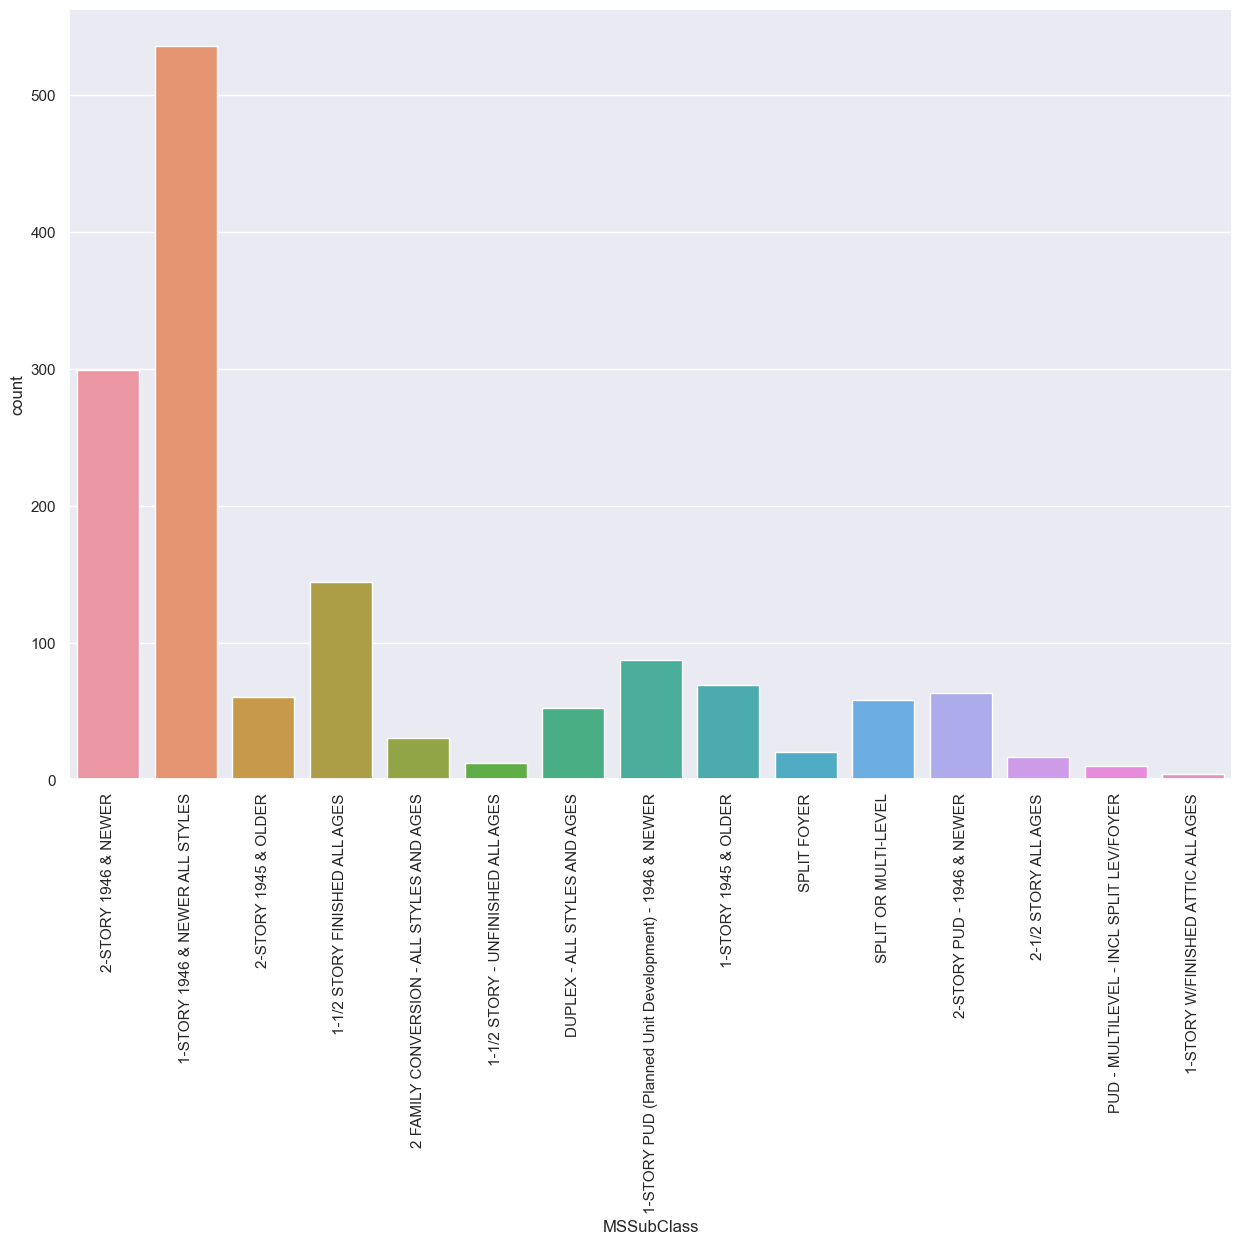

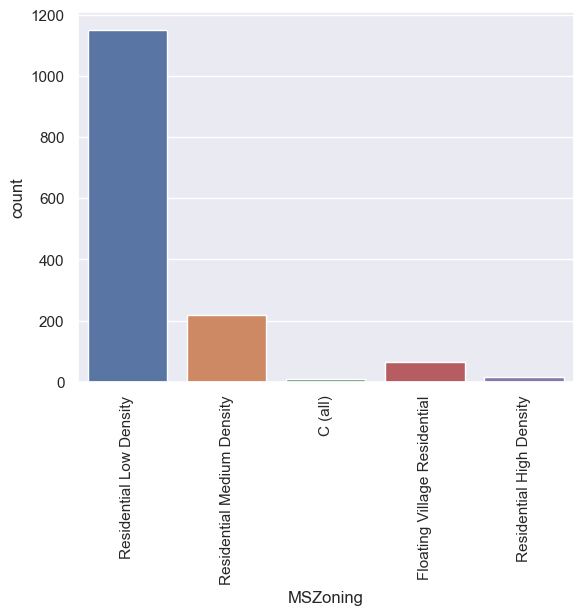

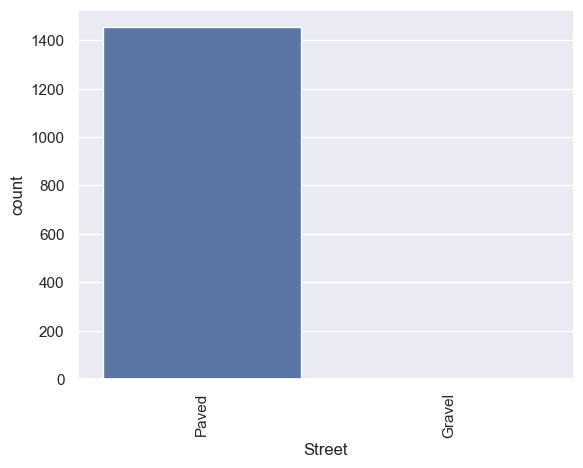

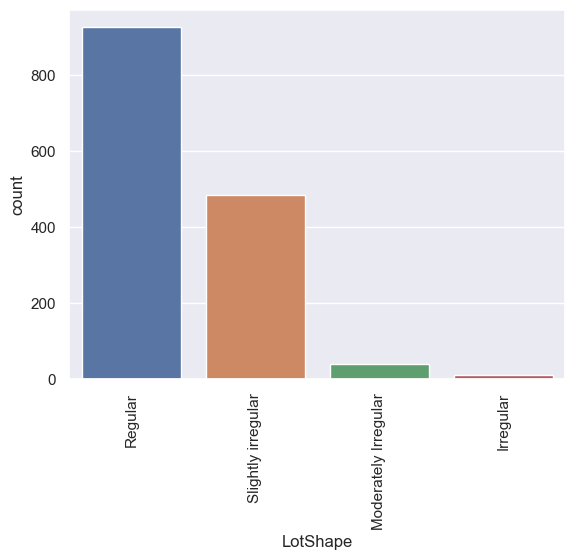

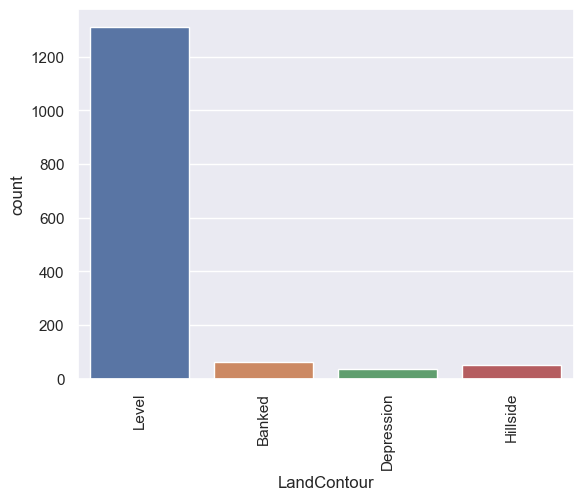

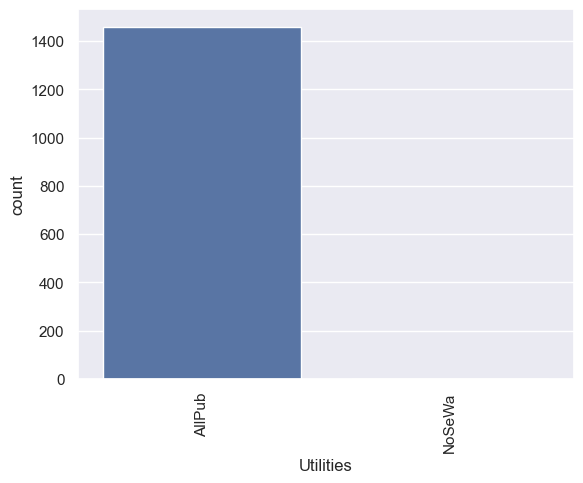

In [194]:
#Category Column Set 1

plt.figure(figsize=(15,10))
for col in ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities']:
    sns.countplot(x = col,  data = data)
    plt.xticks(rotation=90)
    plt.show()

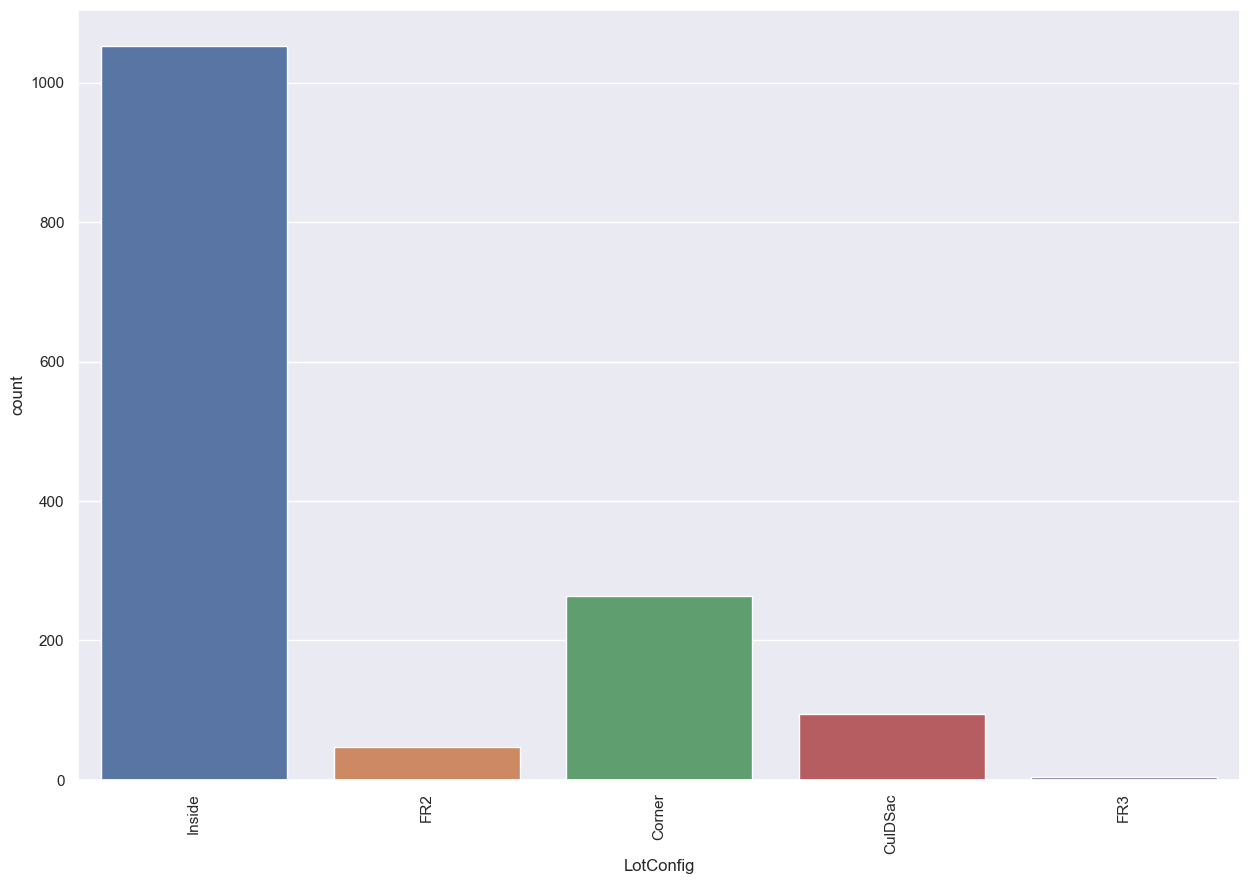

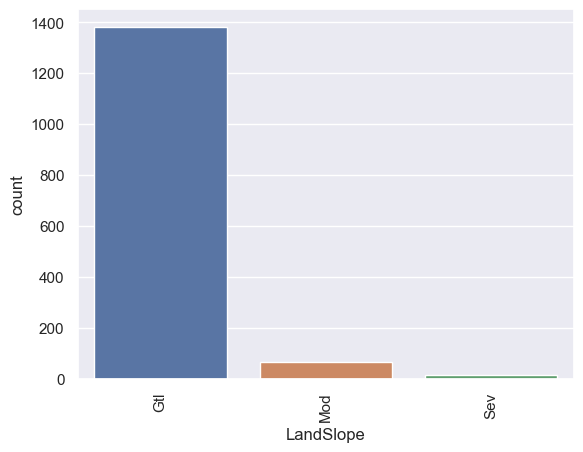

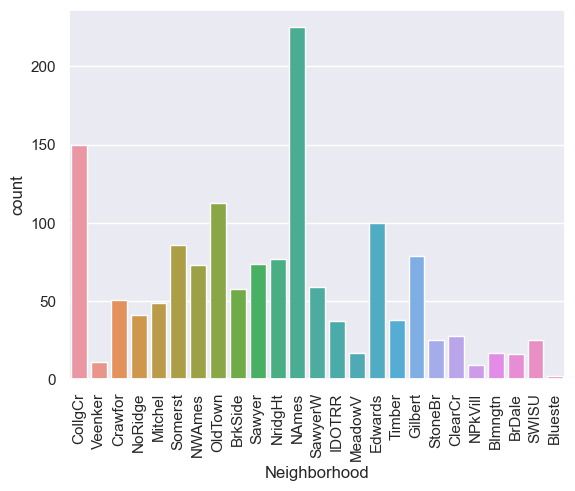

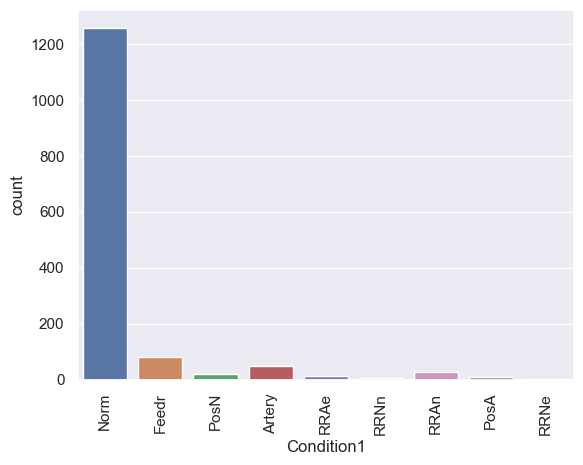

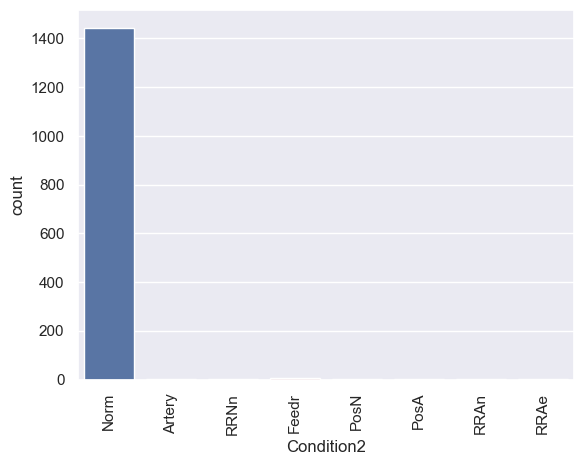

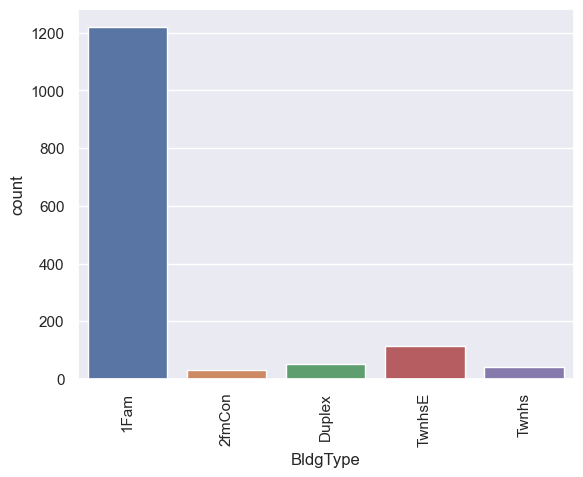

In [195]:
#Category Column Set 2

plt.figure(figsize=(15,10))
for col in ['LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType']:
    sns.countplot(x = col,  data = data)
    plt.xticks(rotation=90)
    plt.show()

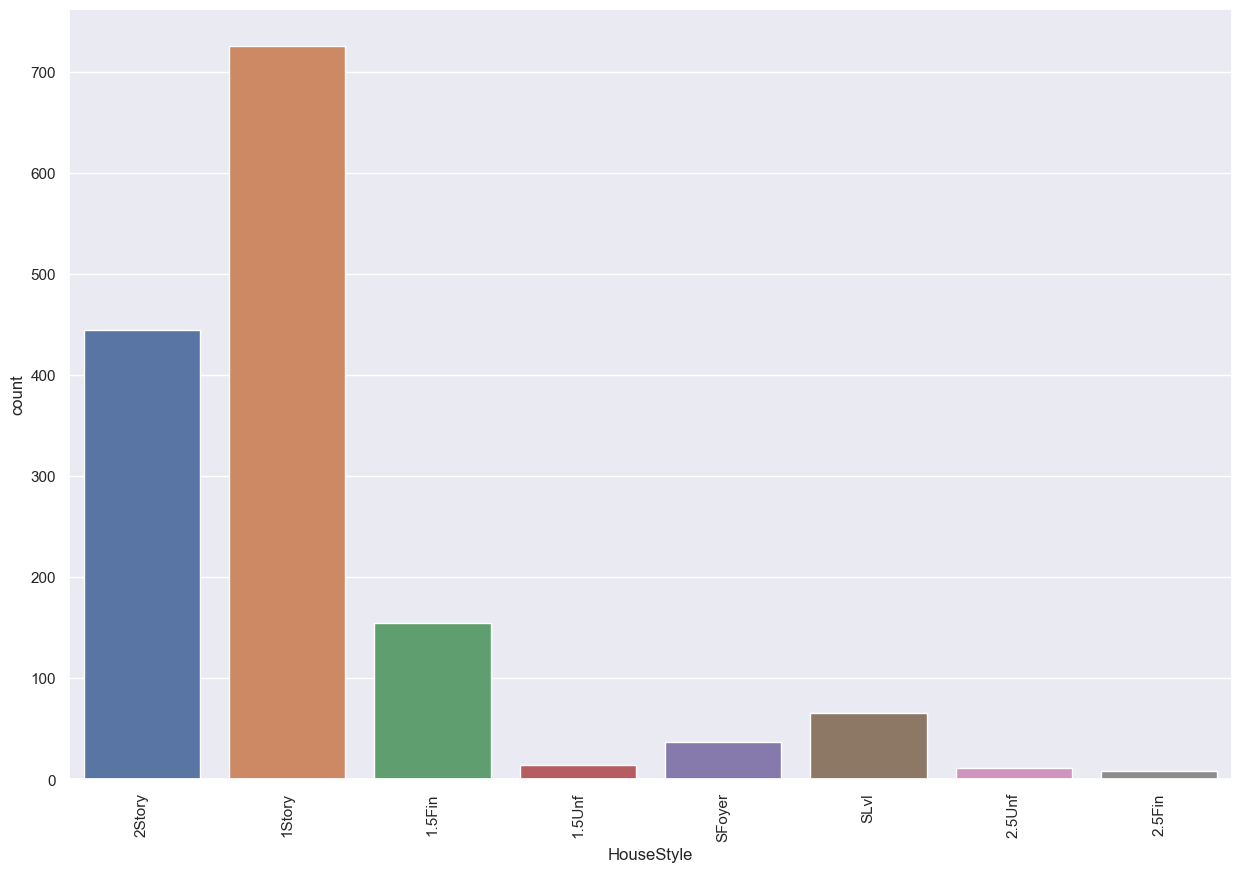

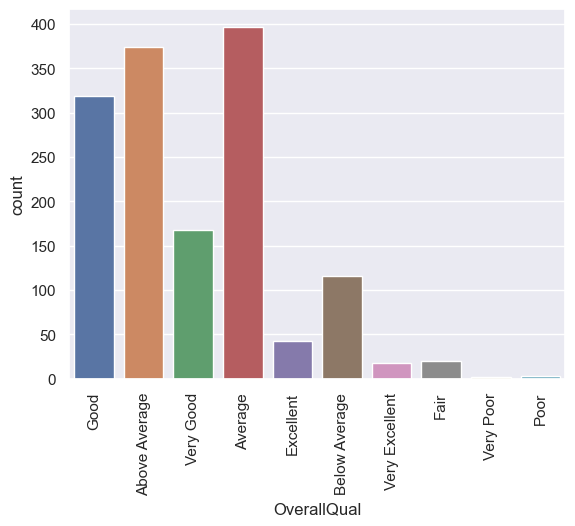

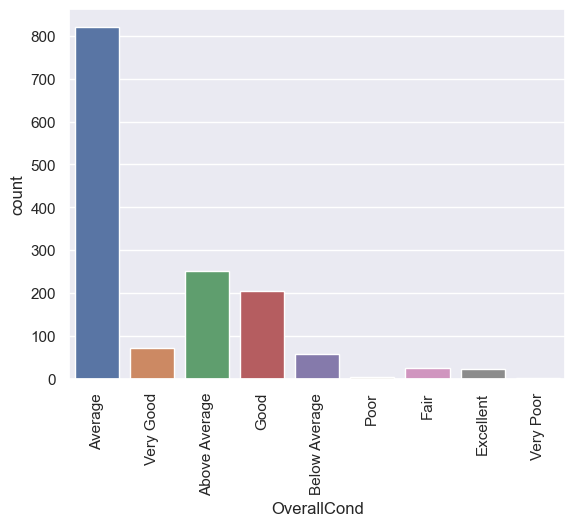

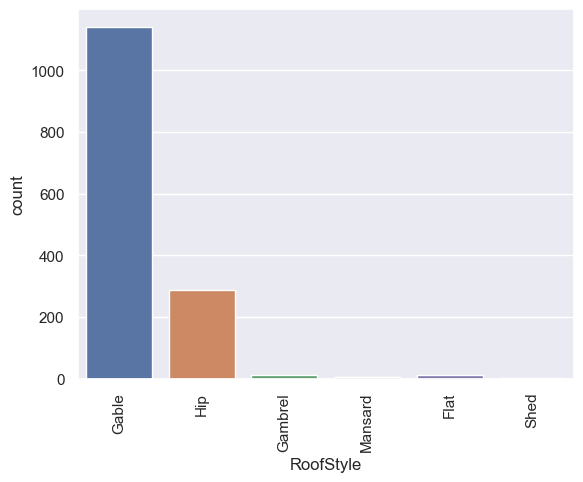

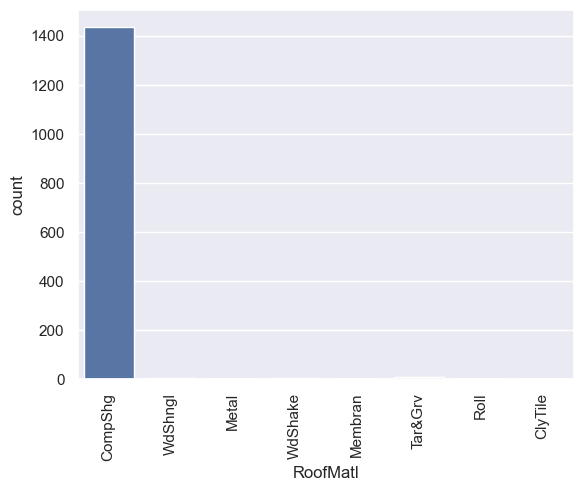

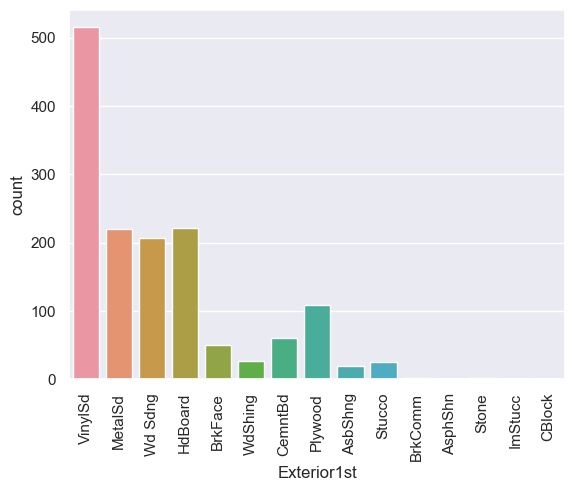

In [196]:
#Category Column Set 3

plt.figure(figsize=(15,10))
for col in ['HouseStyle','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st']:
    sns.countplot(x = col,  data = data)
    plt.xticks(rotation=90)
    plt.show()

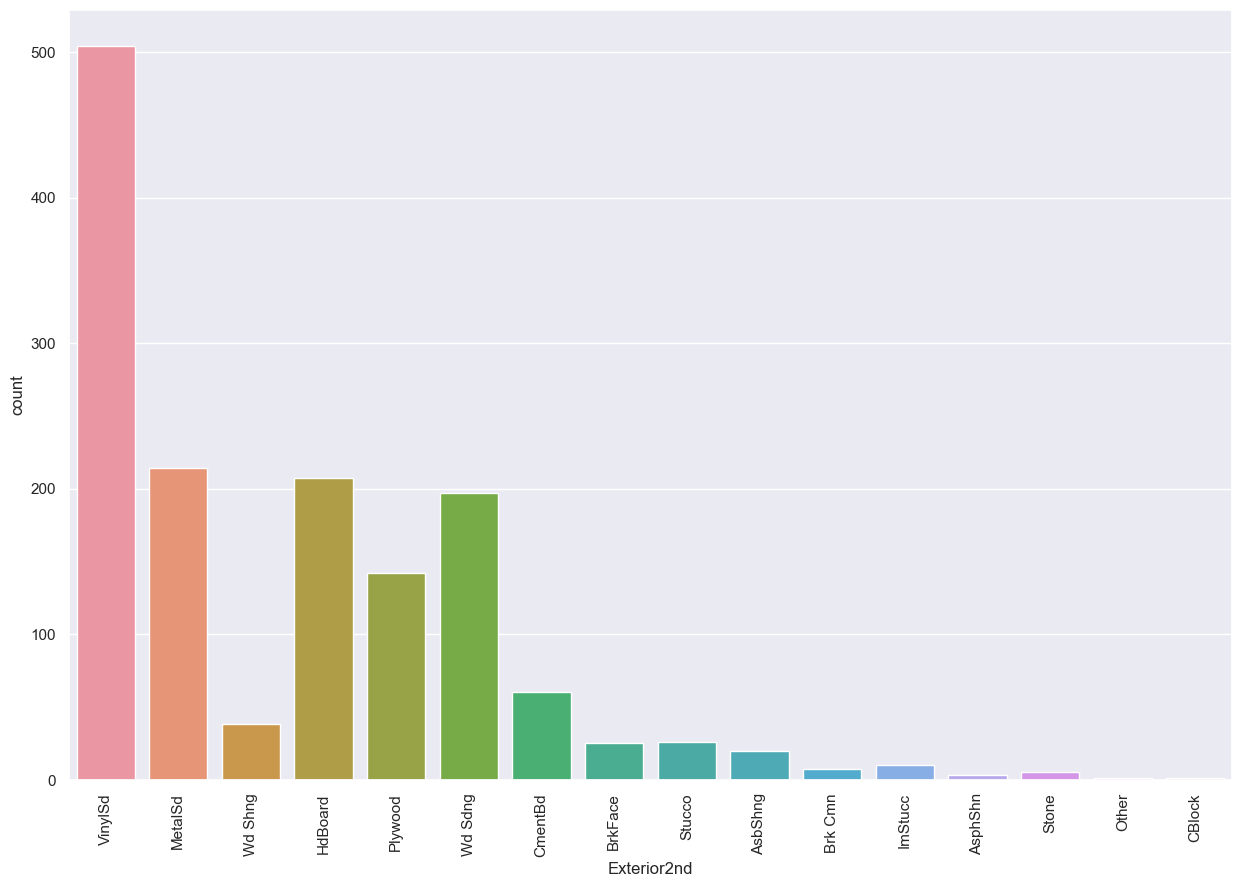

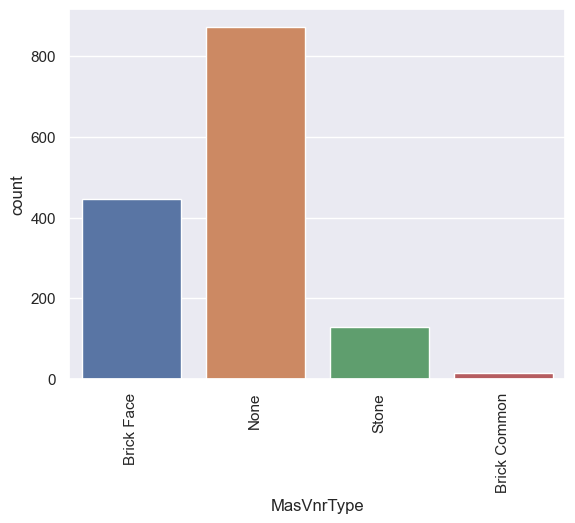

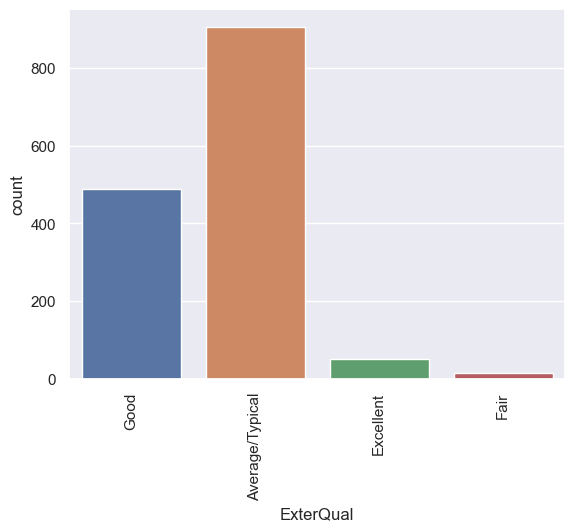

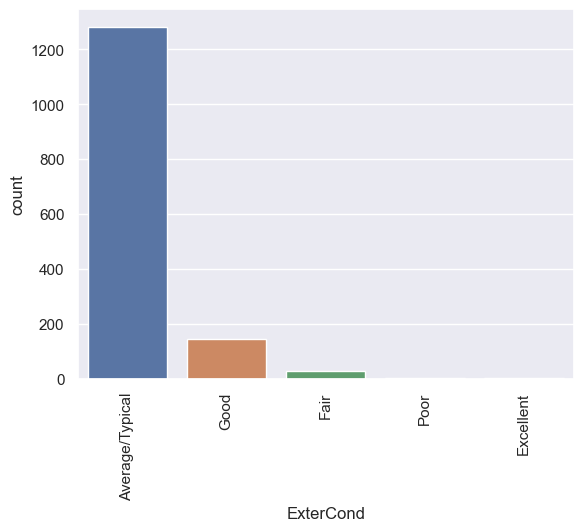

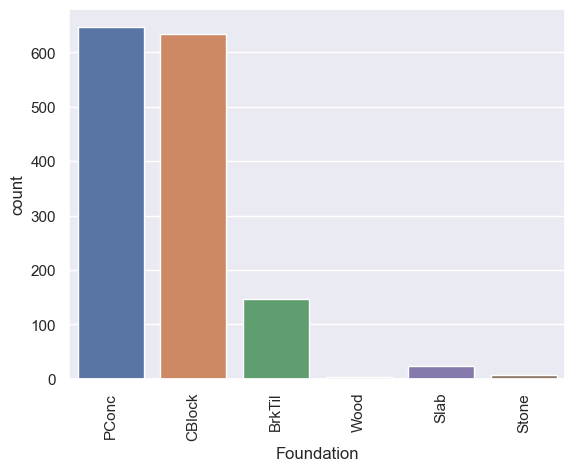

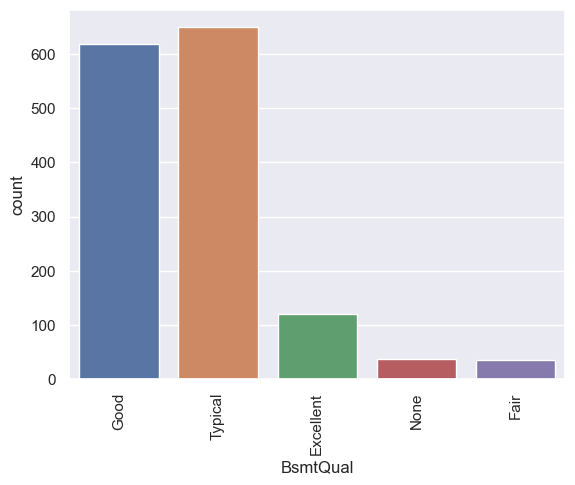

In [197]:
#Category Column Set 4

plt.figure(figsize=(15,10))
for col in ['Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual']:
    sns.countplot(x = col,  data = data)
    plt.xticks(rotation=90)
    plt.show()

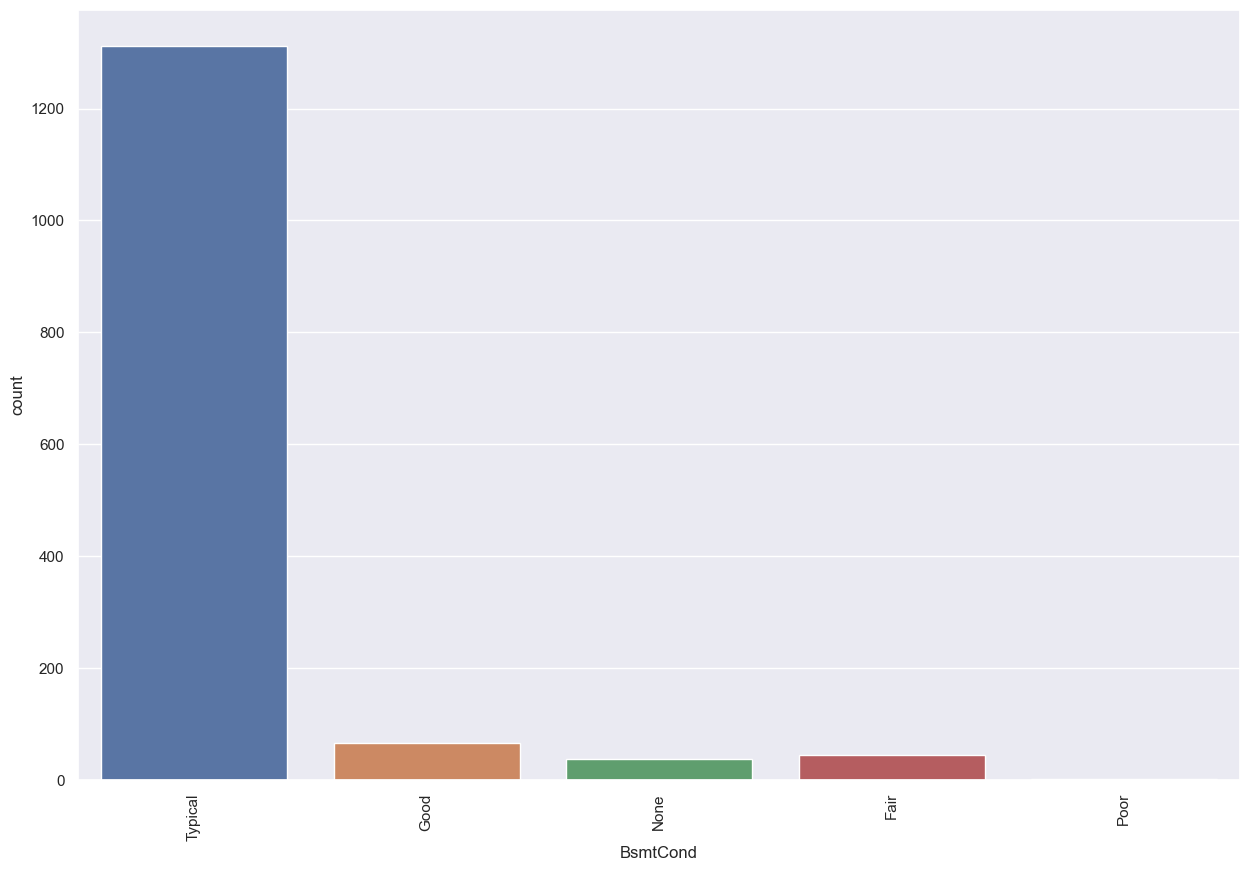

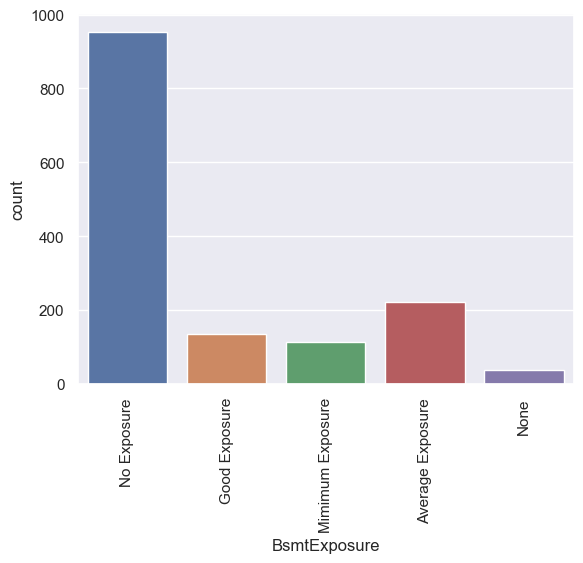

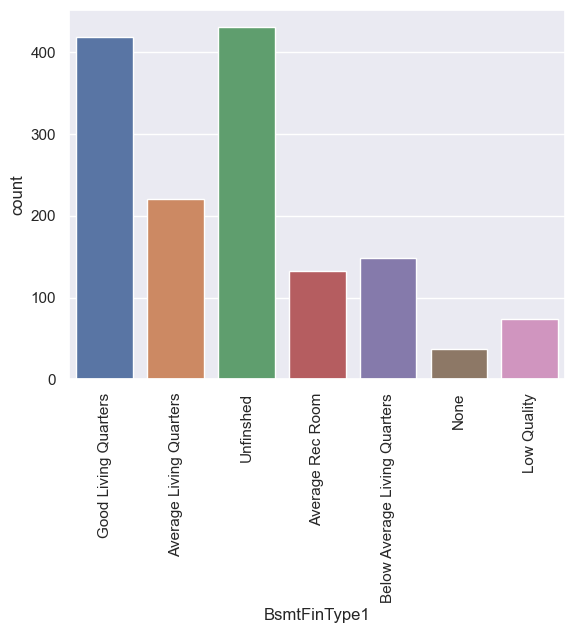

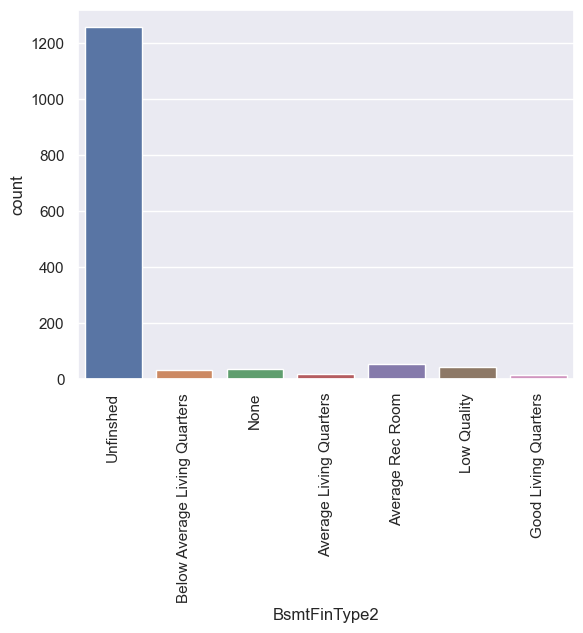

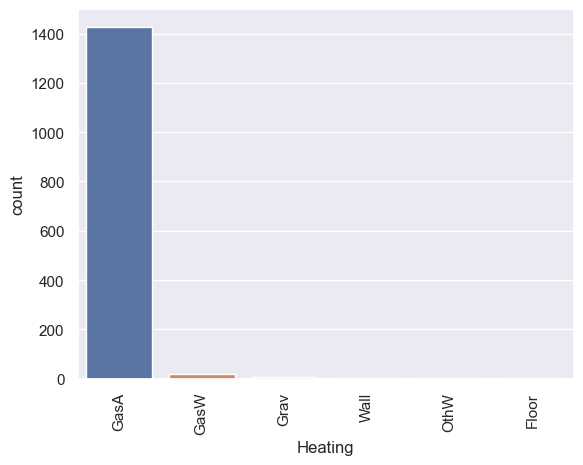

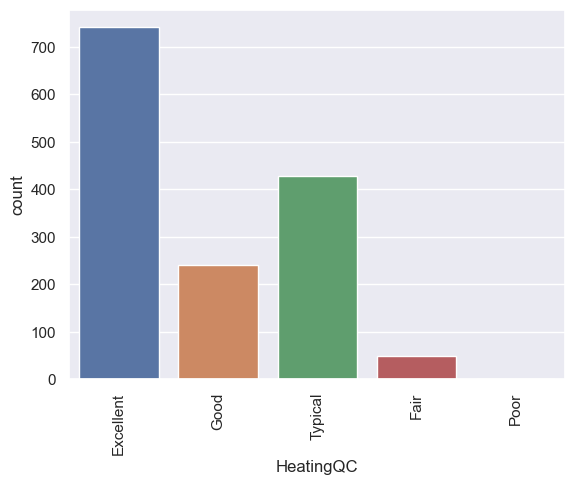

In [198]:
#Category Column Set 5

plt.figure(figsize=(15,10))
for col in ['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC']:
    sns.countplot(x = col,  data = data)
    plt.xticks(rotation=90)
    plt.show()

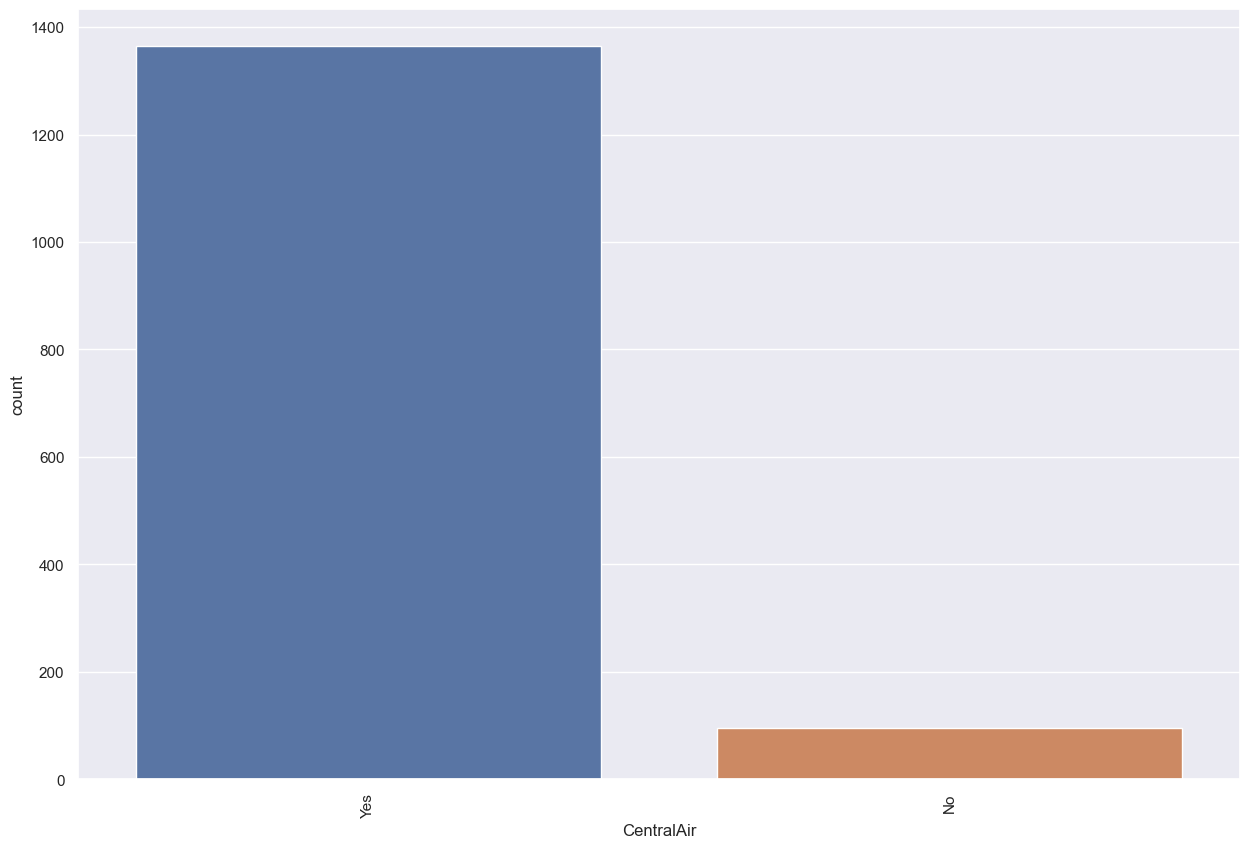

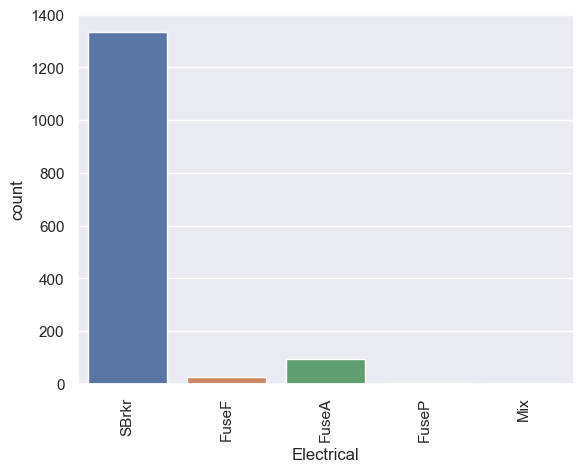

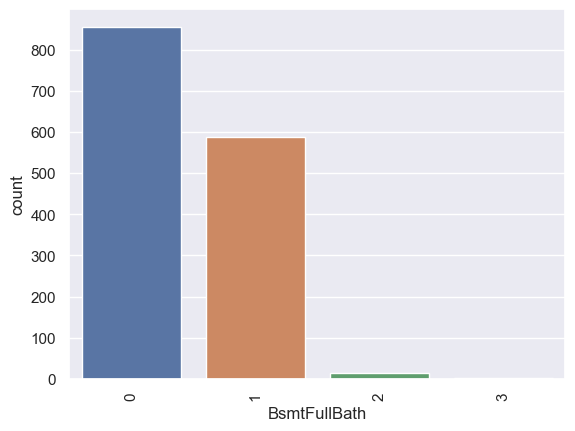

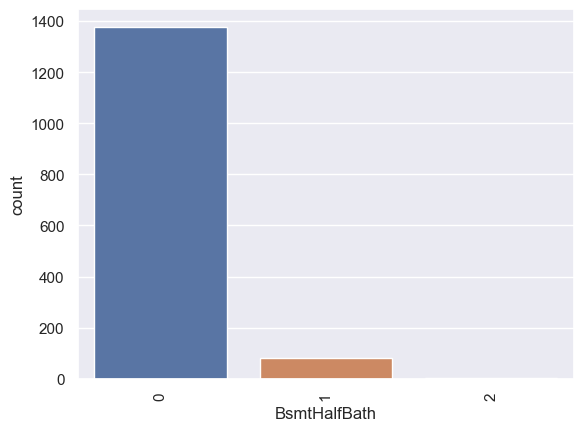

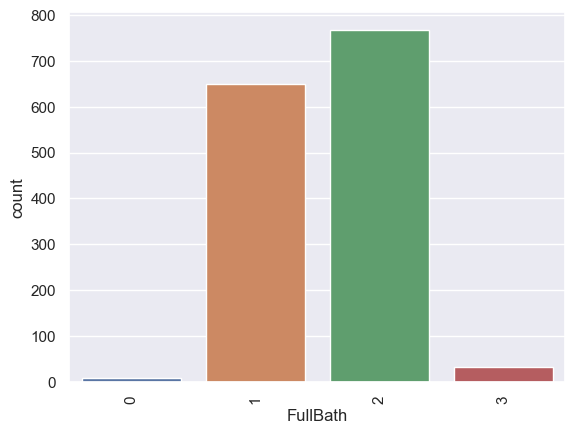

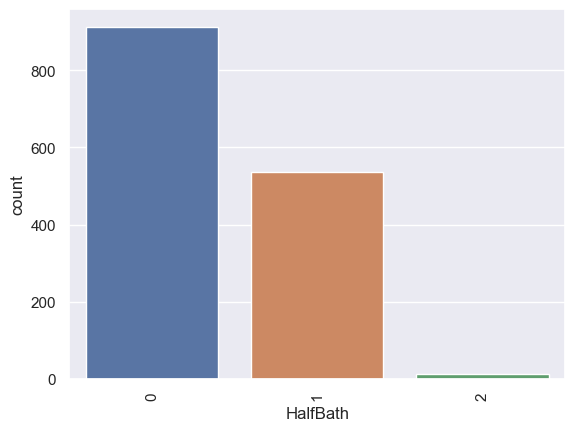

In [199]:
#Category Column Set 6

plt.figure(figsize=(15,10))
for col in ['CentralAir','Electrical','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath']:
    sns.countplot(x = col,  data = data)
    plt.xticks(rotation=90)
    plt.show()

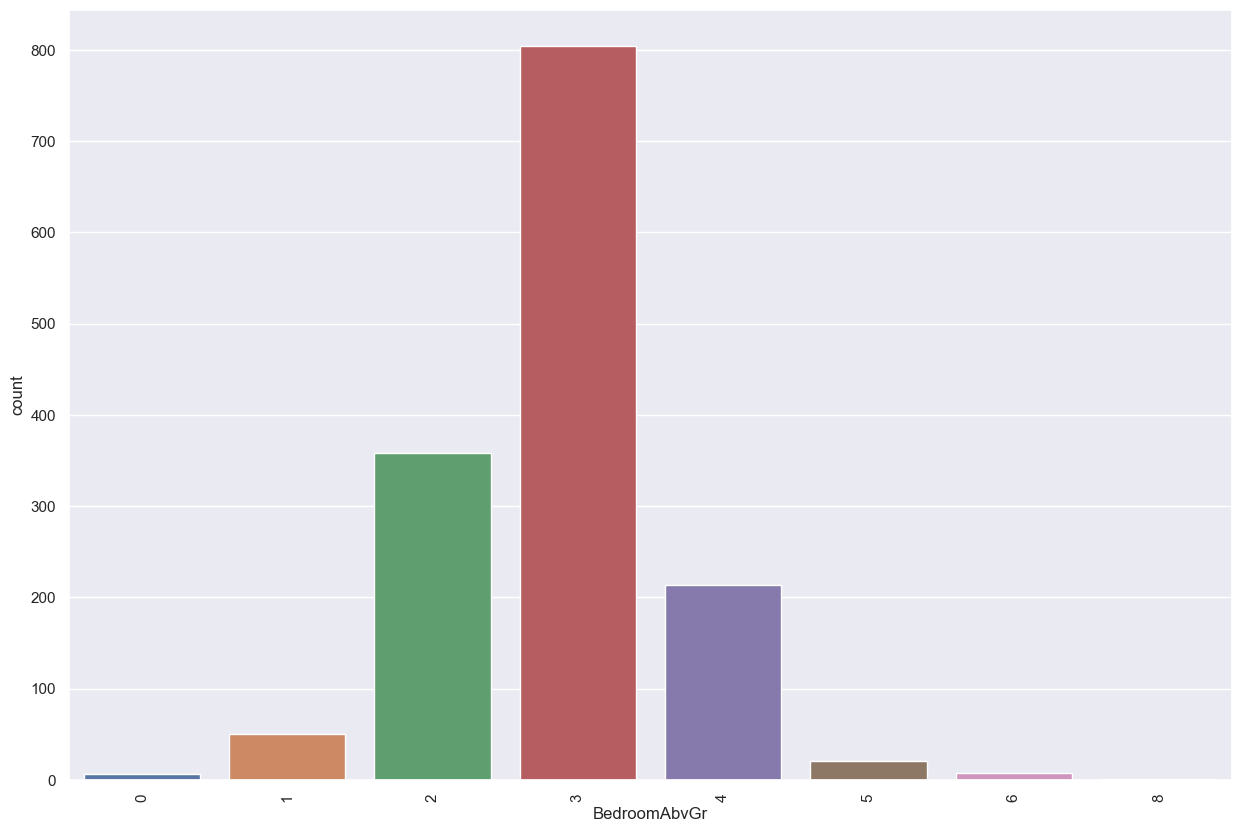

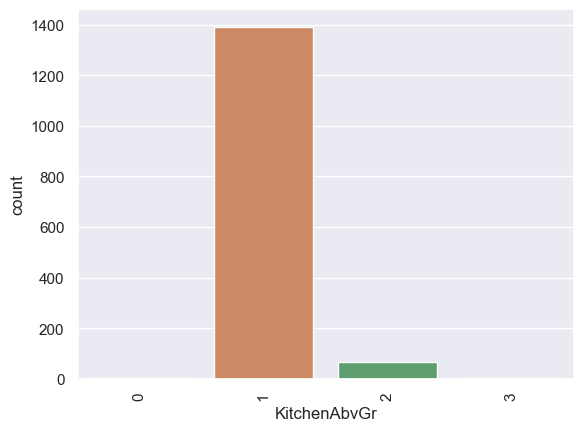

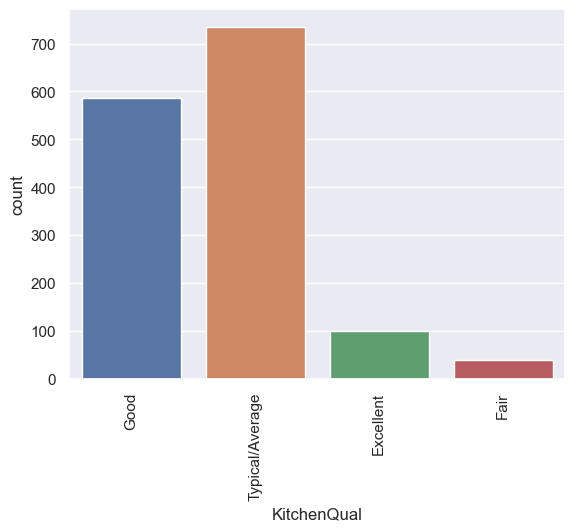

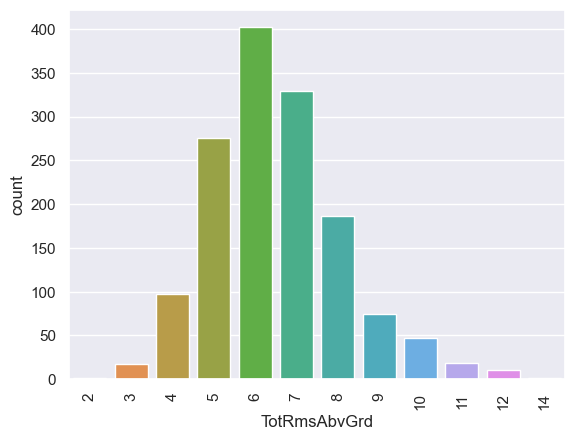

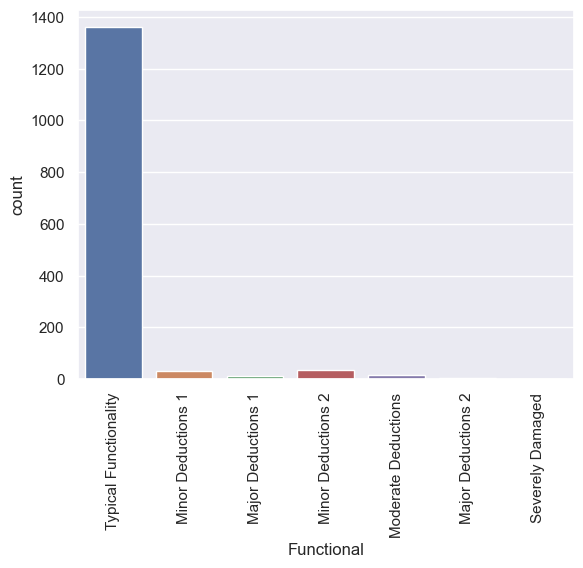

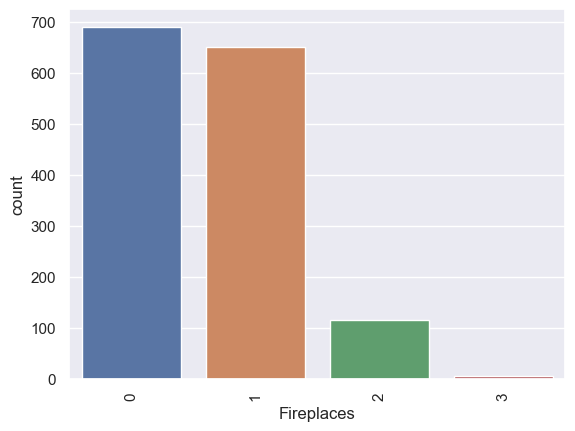

In [200]:
#Category Column Set 7

plt.figure(figsize=(15,10))
for col in ['BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces']:
    sns.countplot(x = col,  data = data)
    plt.xticks(rotation=90)
    plt.show()

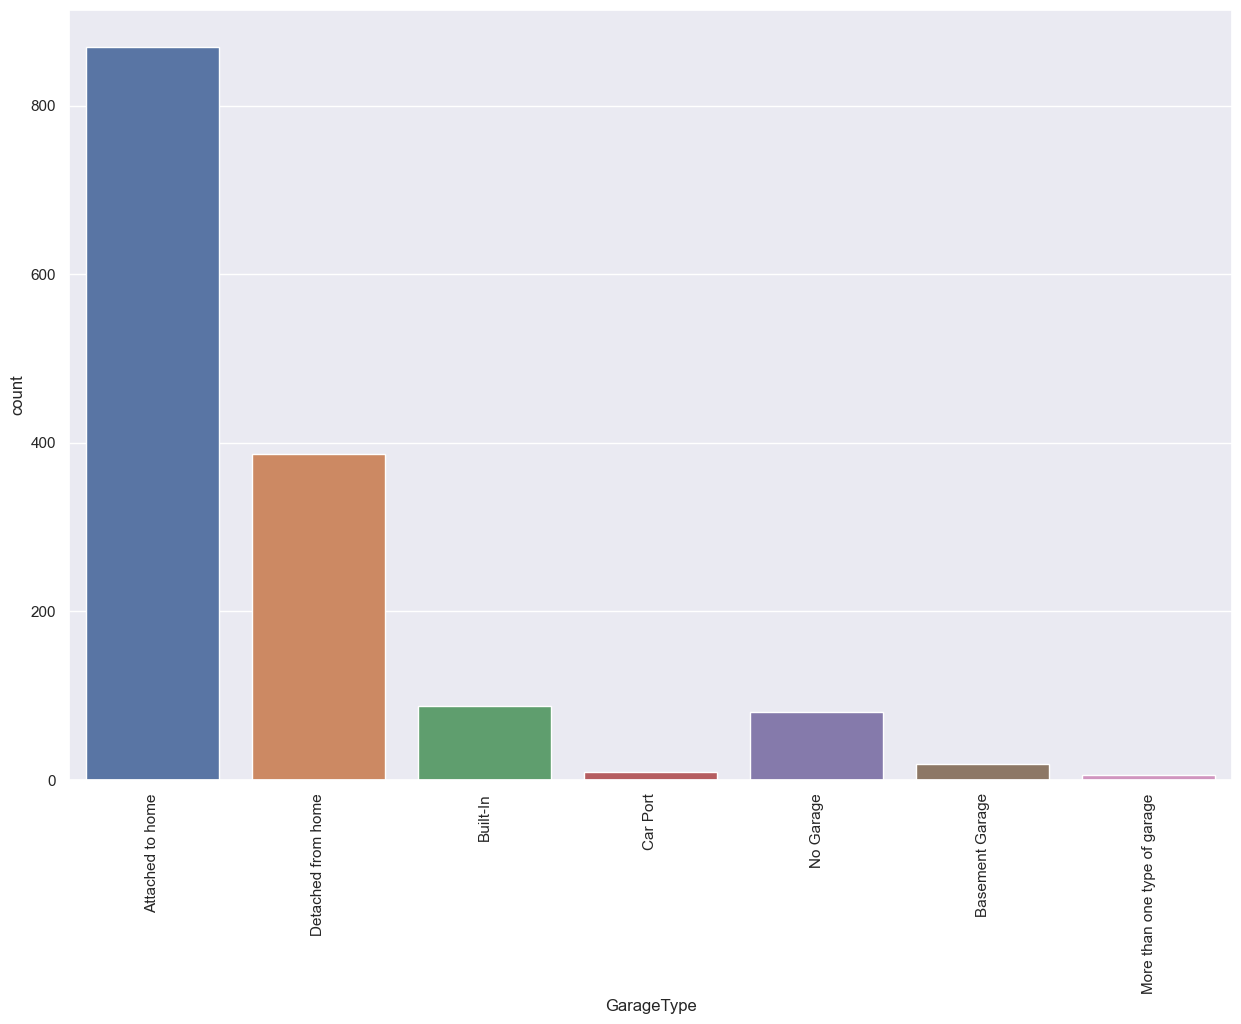

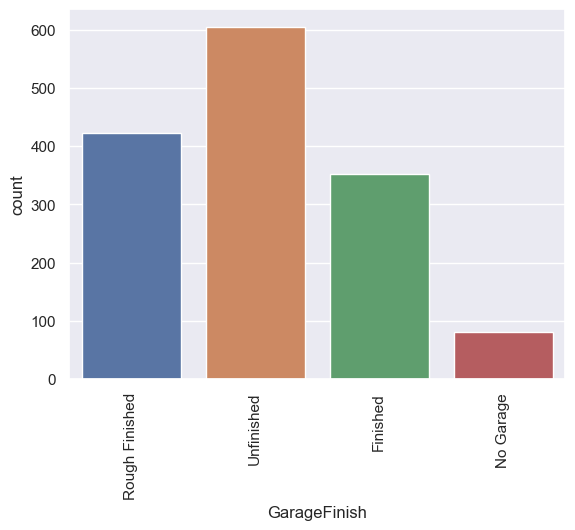

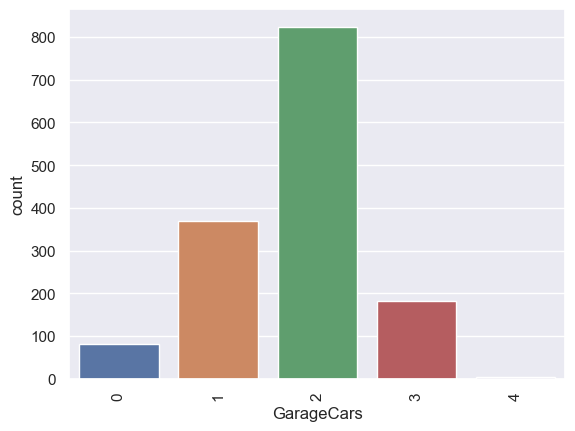

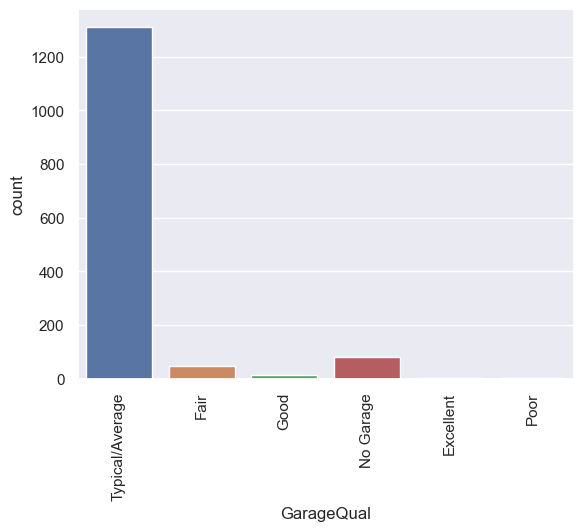

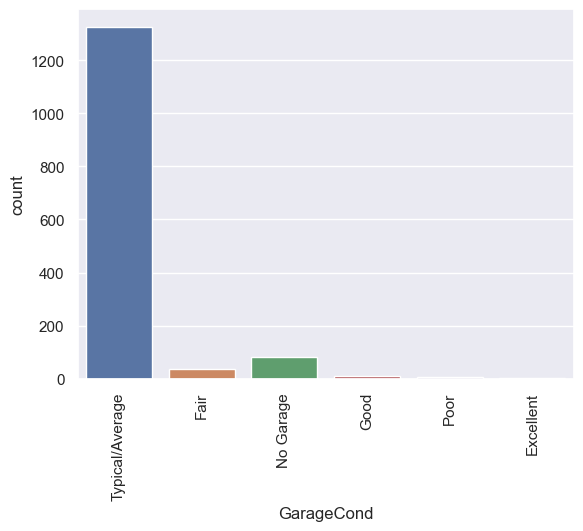

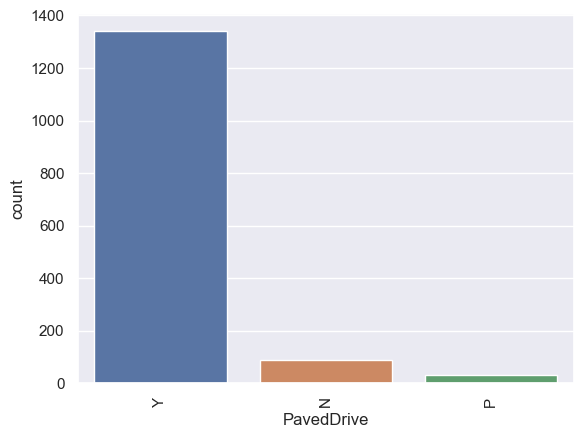

In [201]:
#Category Column Set 8

plt.figure(figsize=(15,10))
for col in ['GarageType','GarageFinish','GarageCars','GarageQual','GarageCond','PavedDrive']:
    sns.countplot(x = col,  data = data)
    plt.xticks(rotation=90)
    plt.show()

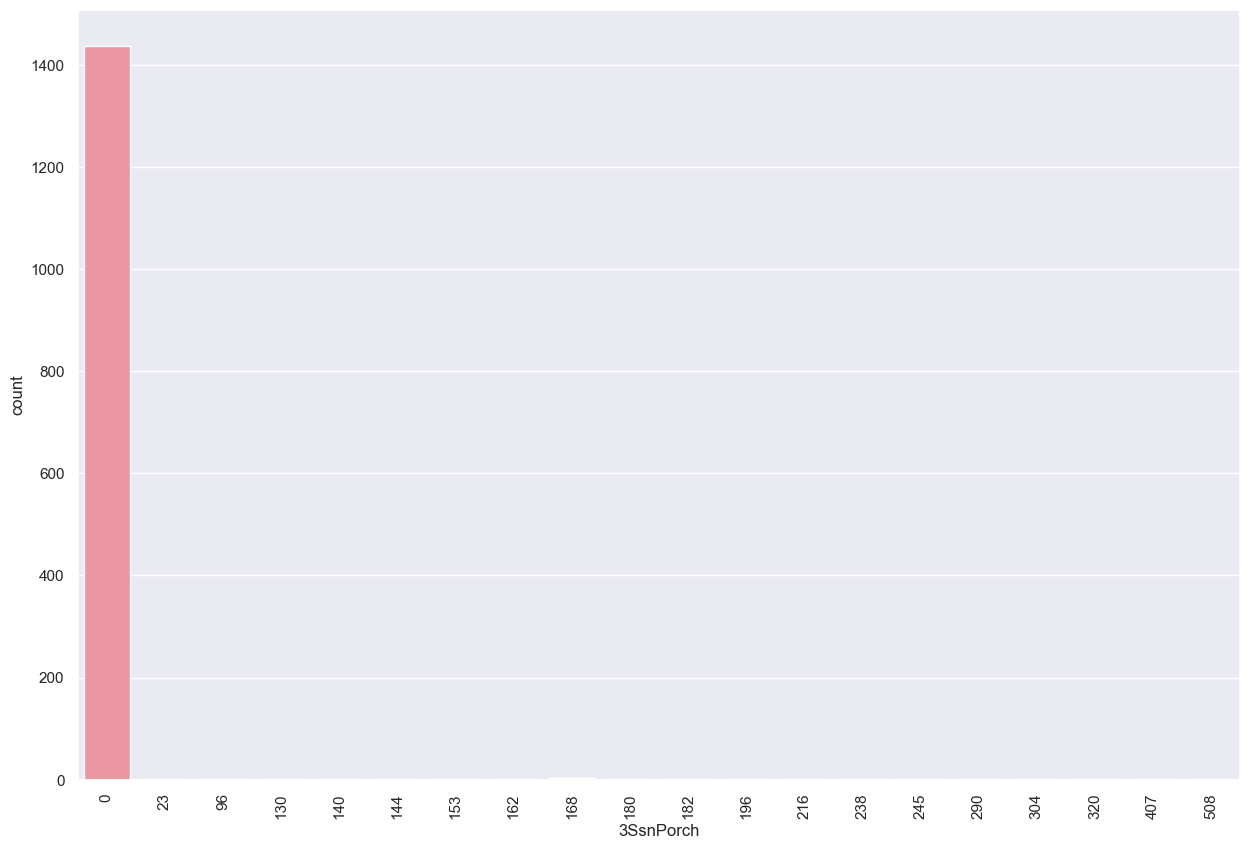

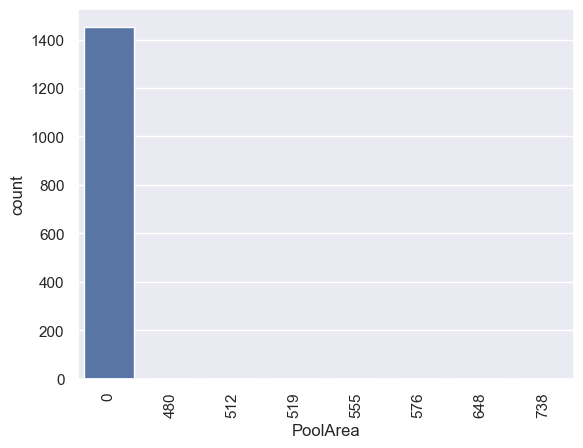

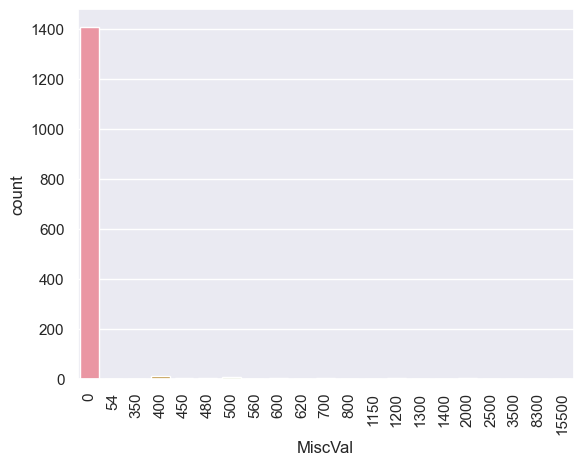

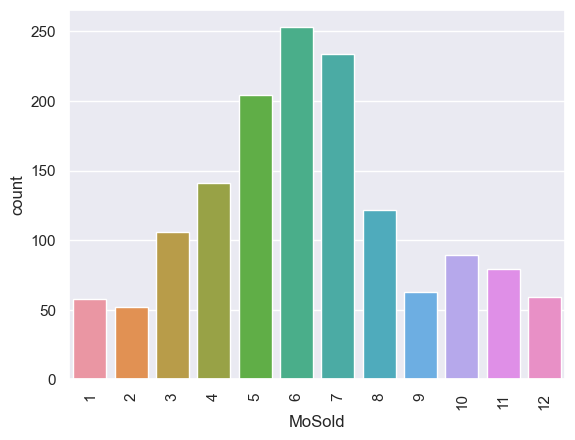

ValueError: Could not interpret input 'YrSold'

In [202]:
#Category Column Set 9

plt.figure(figsize=(15,10))
for col in ['3SsnPorch','PoolArea','MiscVal','MoSold','YrSold','SaleType']:
    sns.countplot(x = col,  data = data)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
#Category Column Set 10

plt.figure(figsize=(15,10))
for col in ['SaleCondition']:
    sns.countplot(x = col,  data = data)
    plt.xticks(rotation=90)
    plt.show()

In [203]:
#Now from the above graph we see that there are many highly skewed column which we can remove/drop from our set 

skewed_columns=['Functional','GarageQual','GarageCond','SaleType','CentralAir','Heating','ExterCond','RoofMatl',
                'Utilities','Street','Condition1','Condition2','LandSlope','LandContour','Electrical','BsmtFinType2',
                'PavedDrive','BsmtCond']

data.drop(skewed_columns,axis=1,inplace=True)

for x in skewed_columns:
    cat_cols.remove(x)

cat_cols

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SaleCondition']

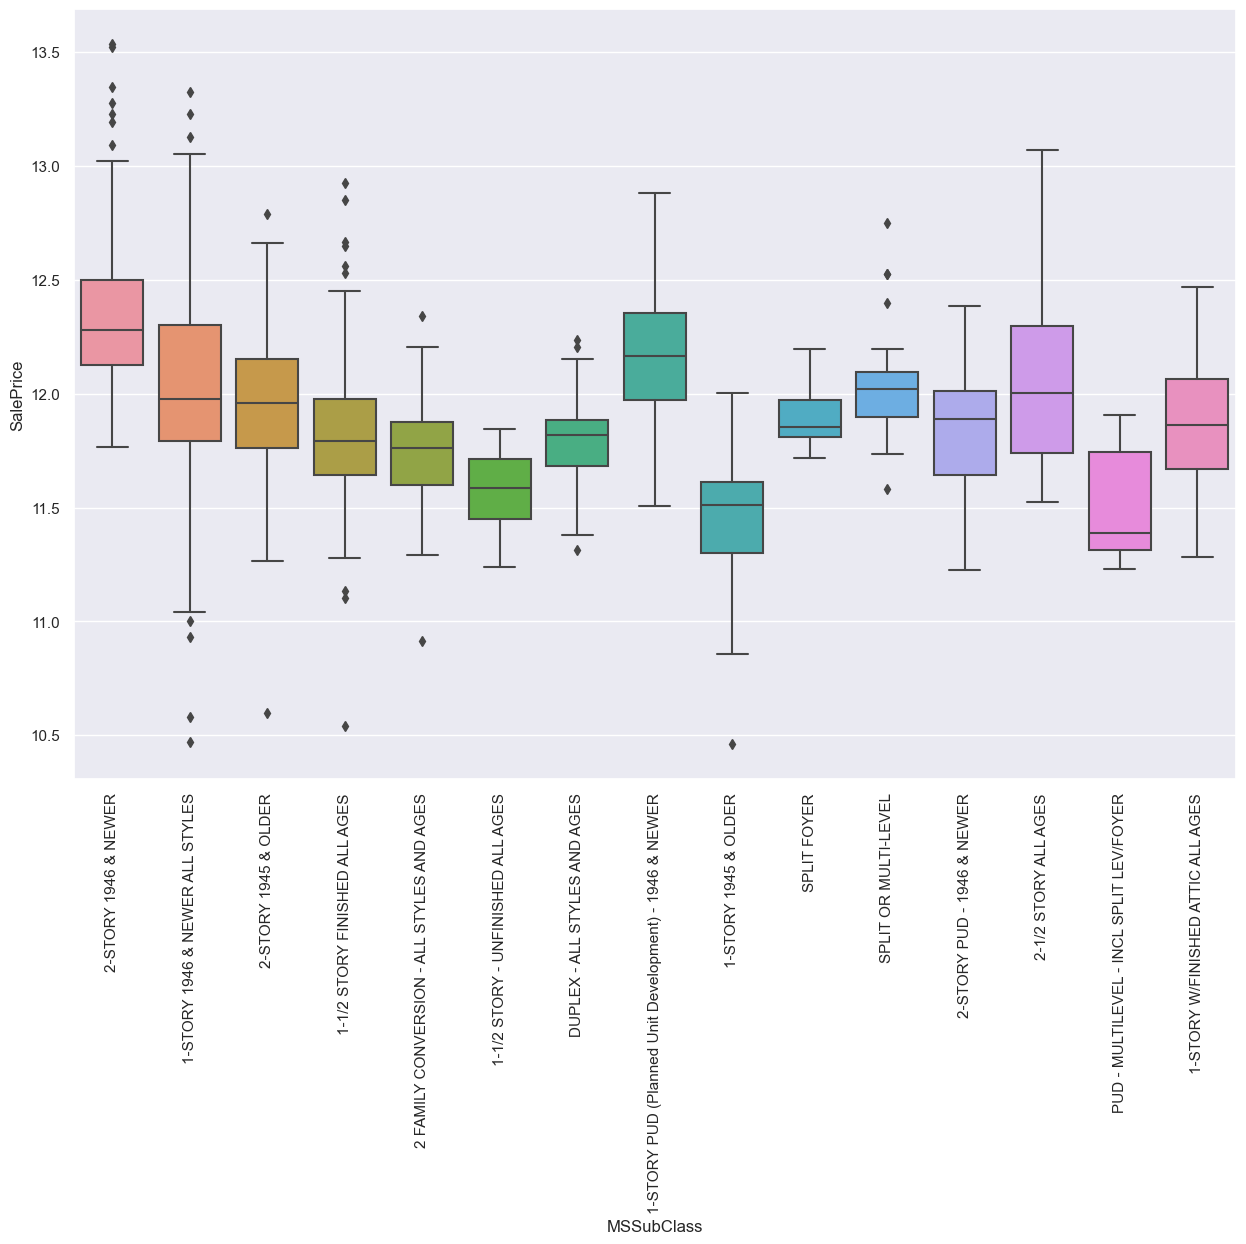

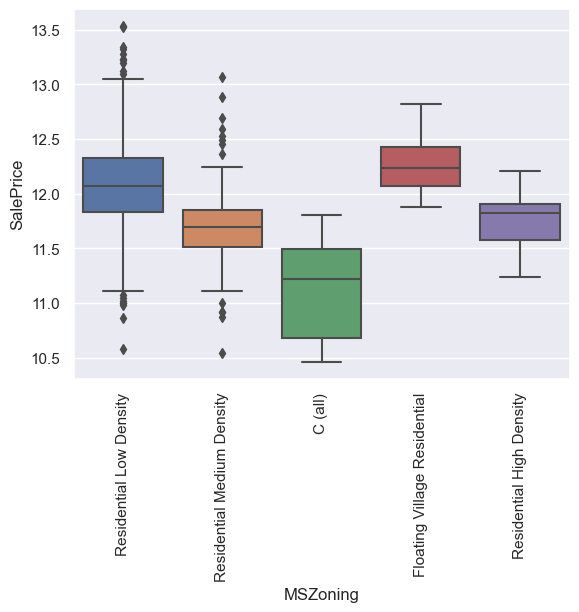

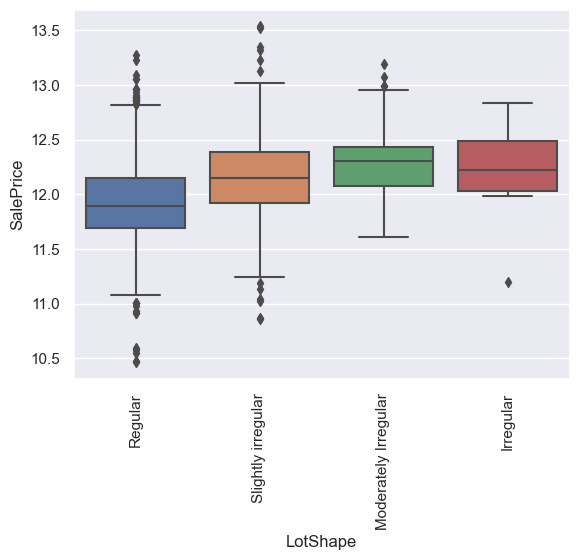

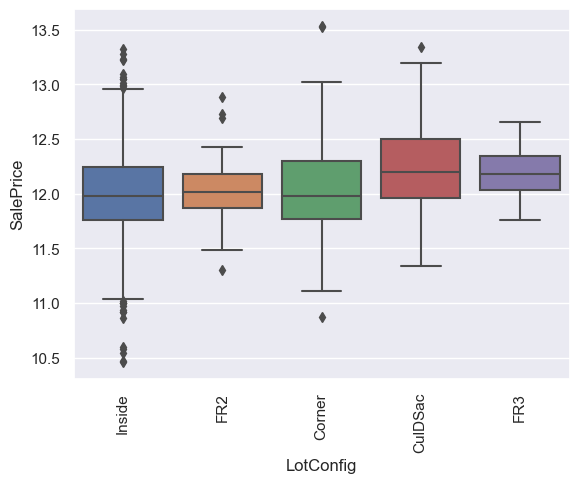

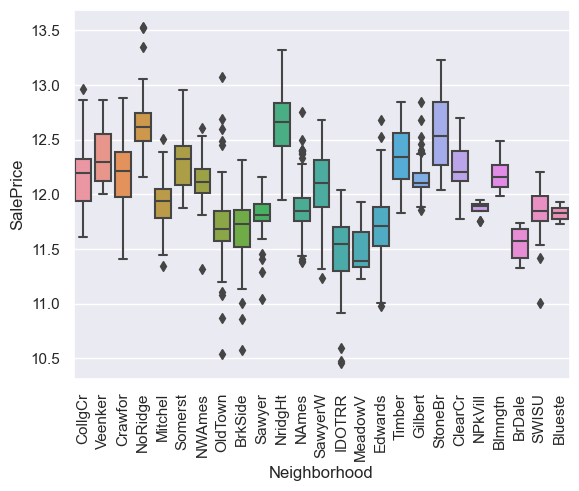

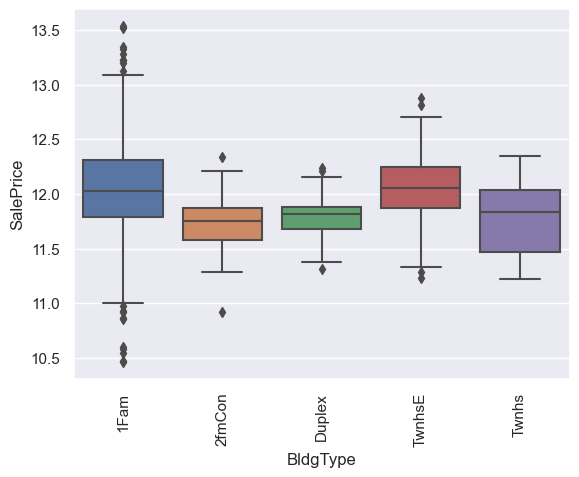

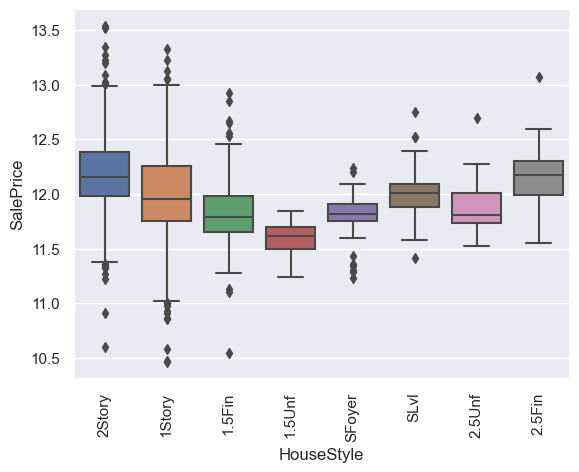

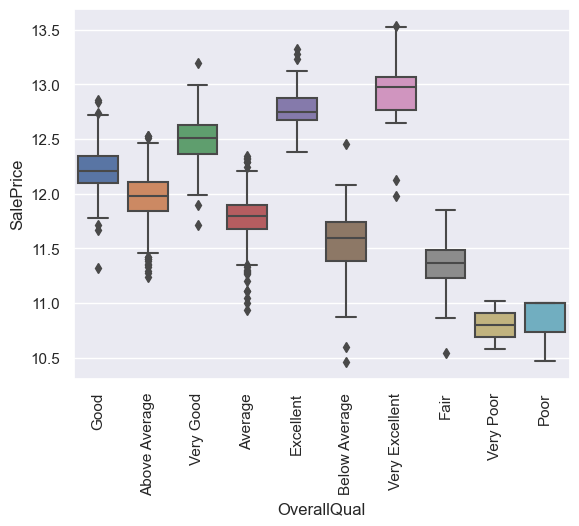

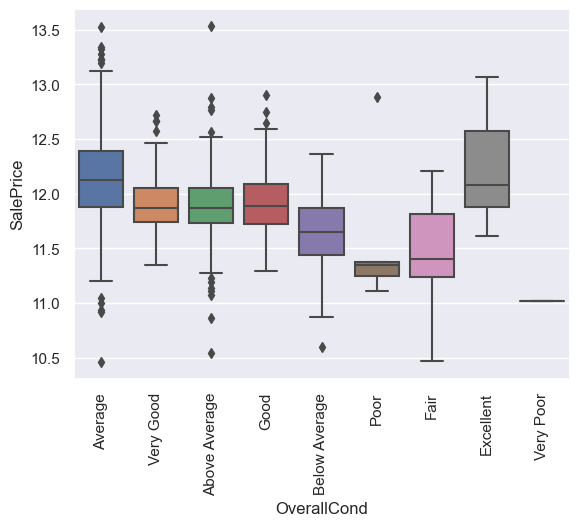

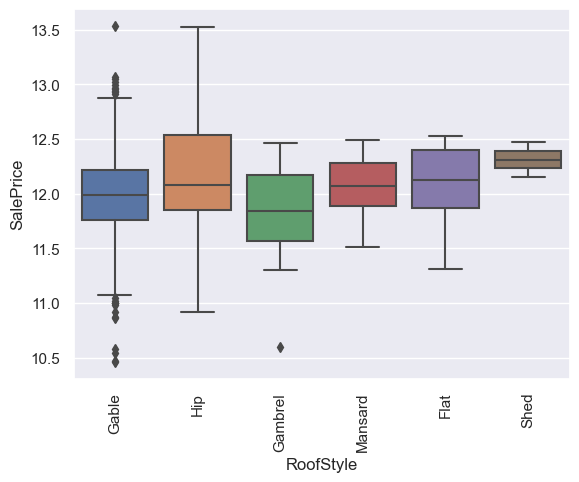

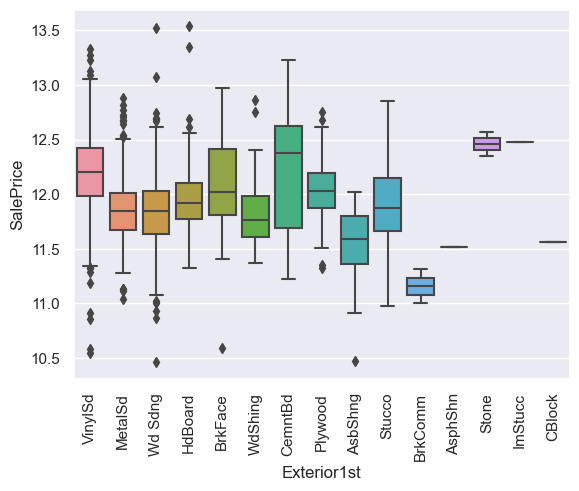

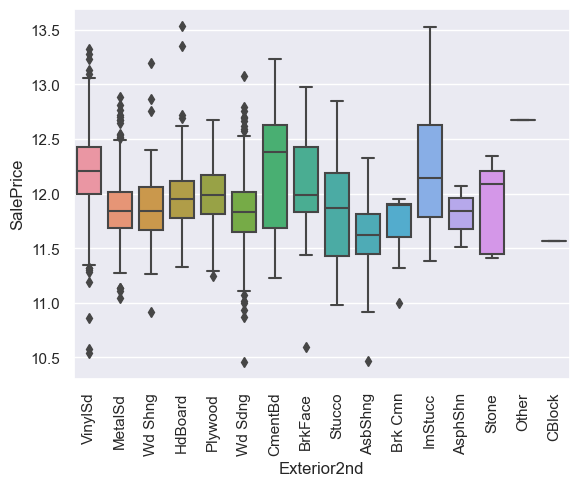

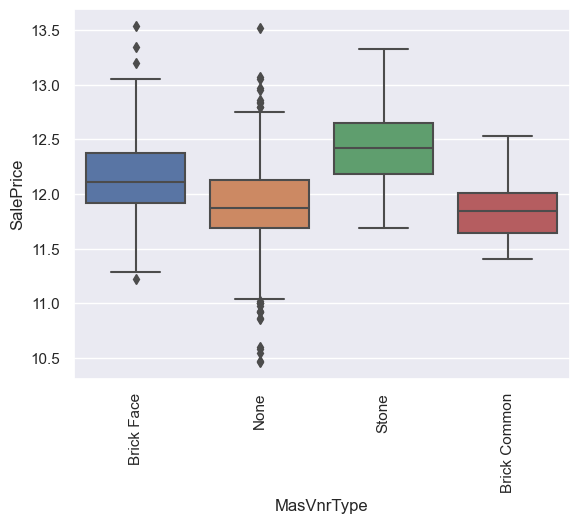

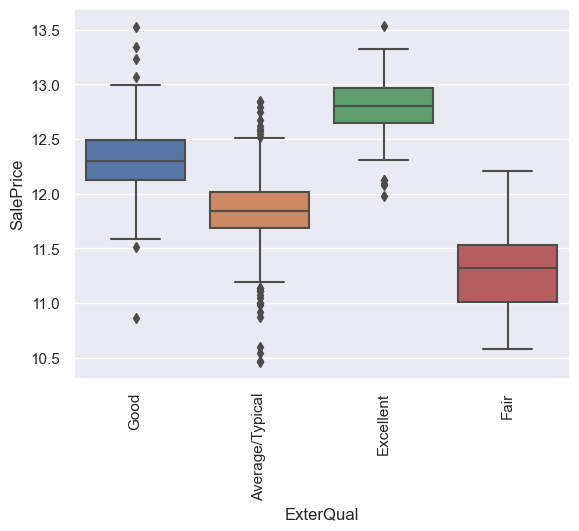

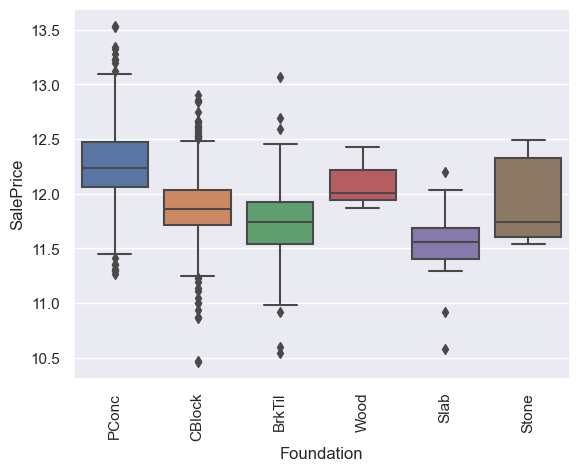

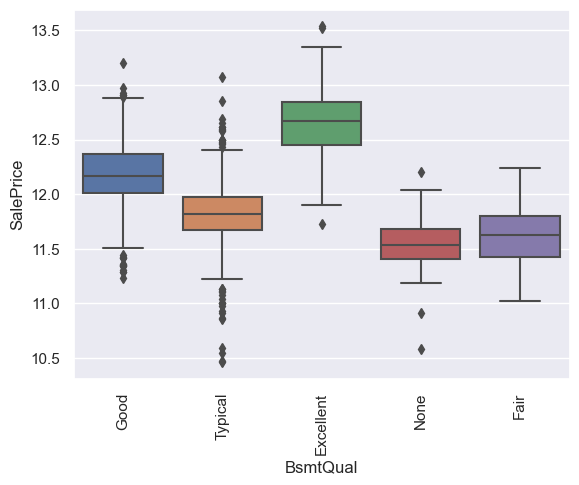

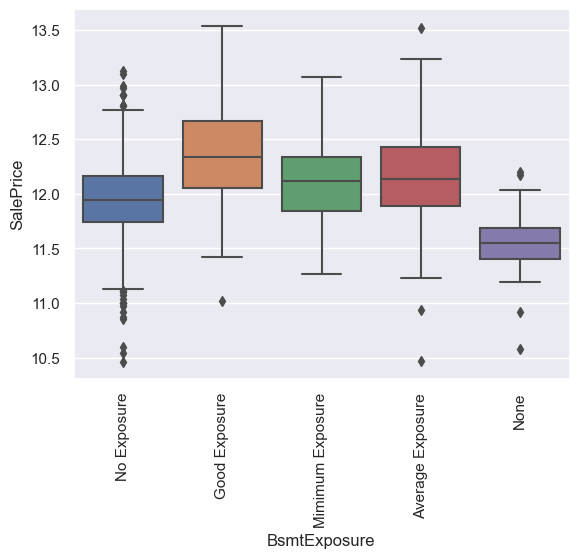

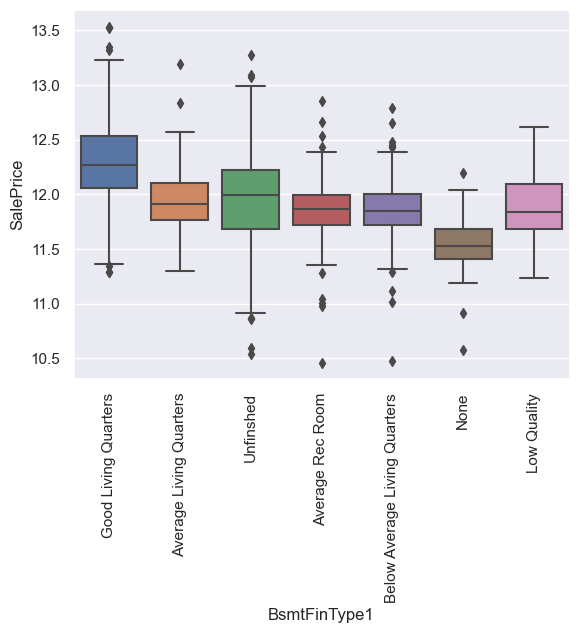

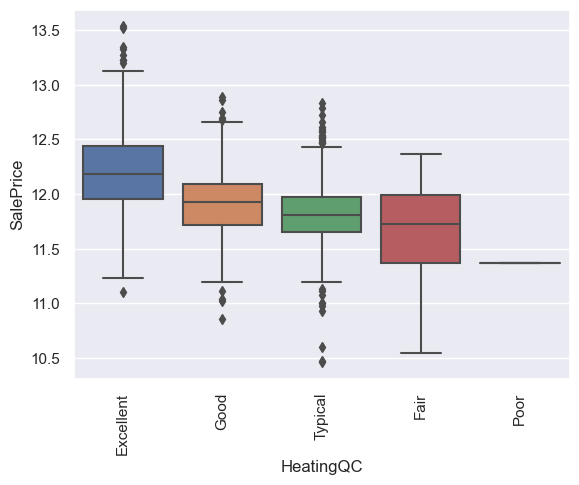

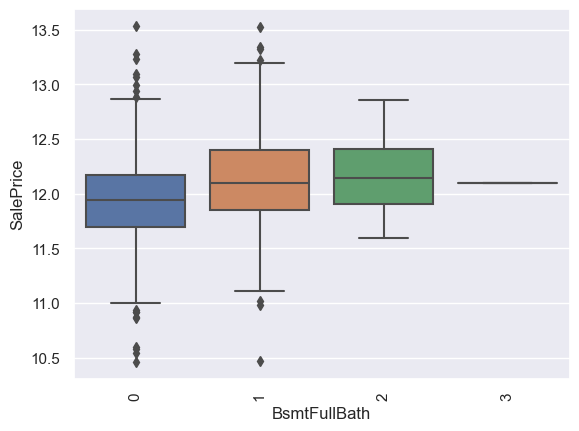

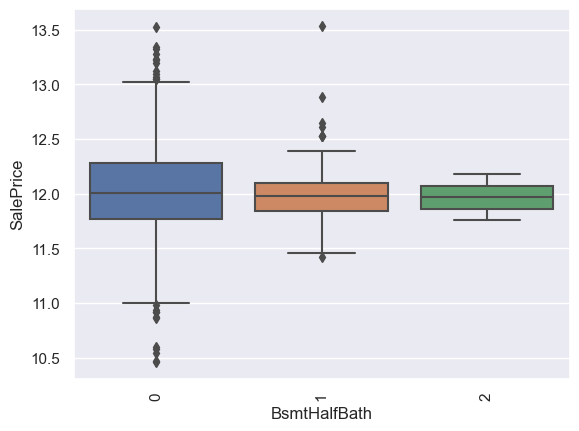

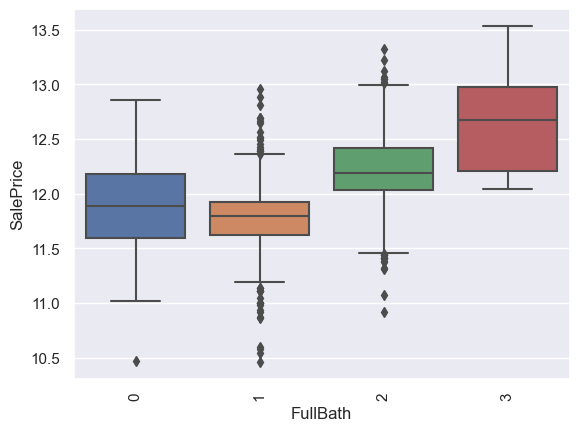

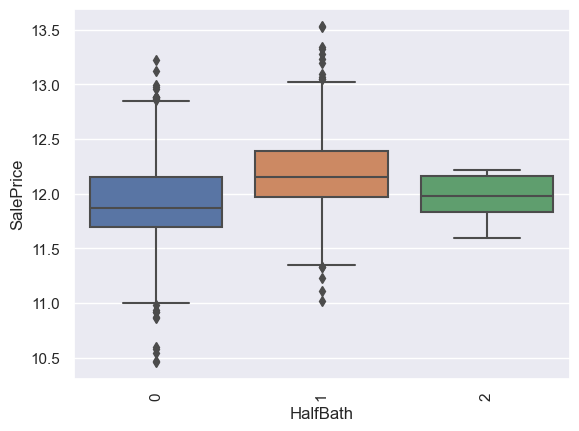

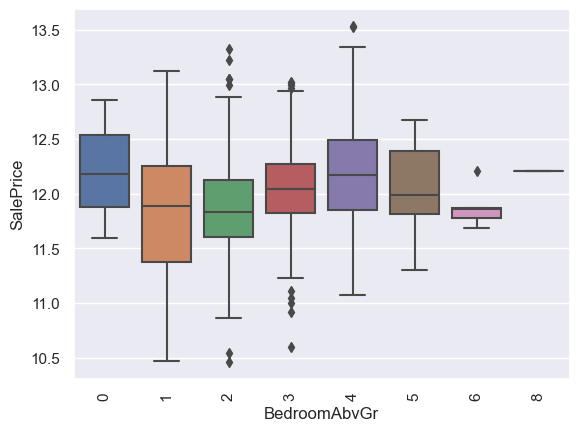

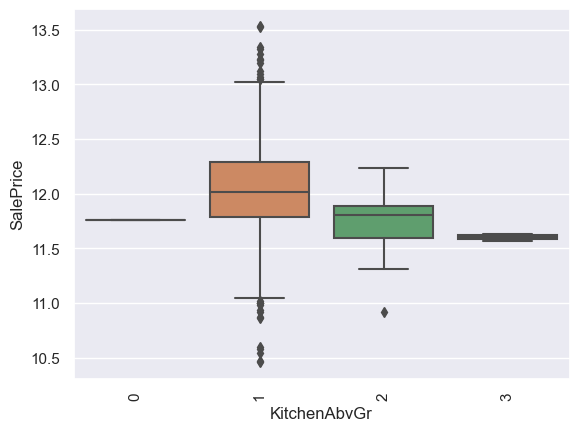

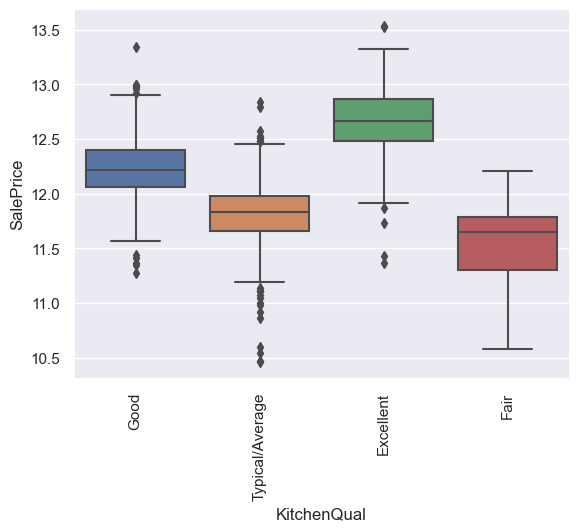

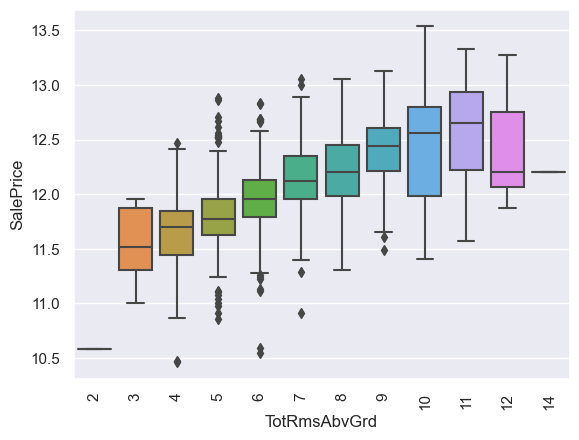

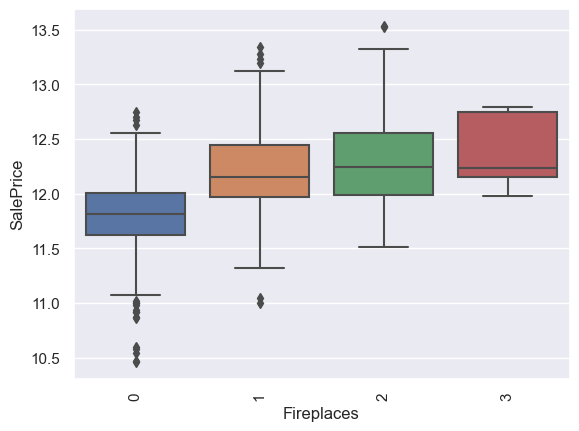

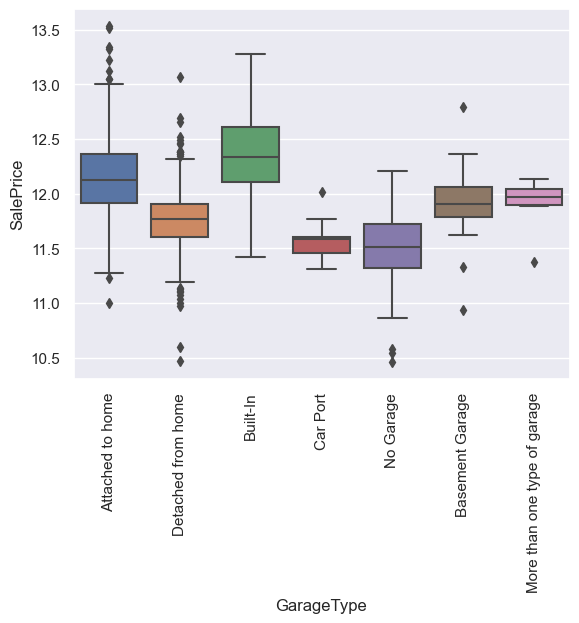

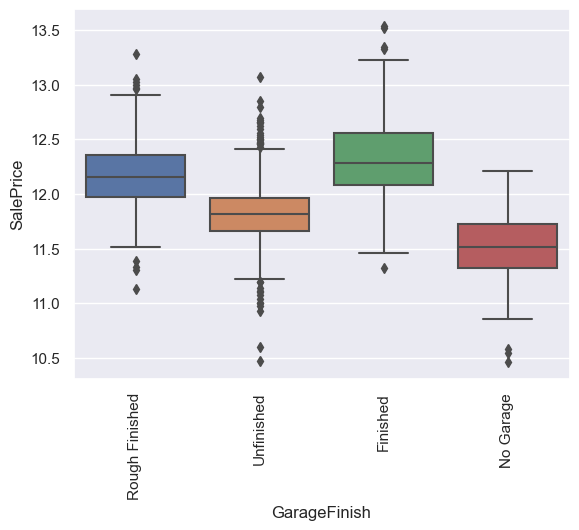

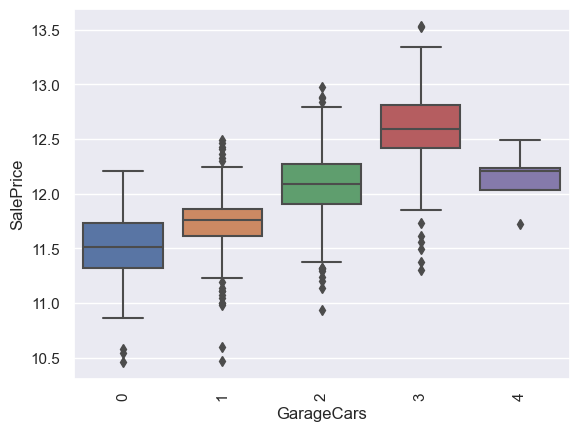

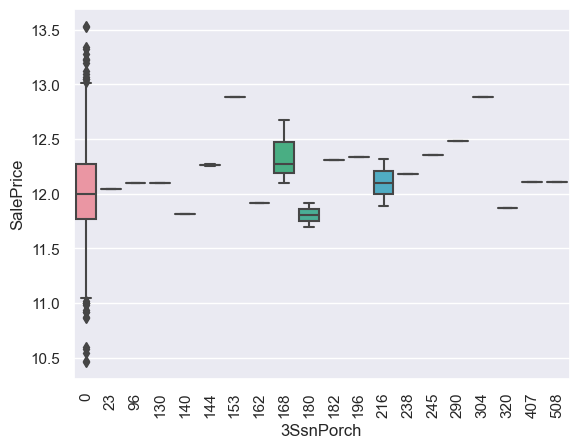

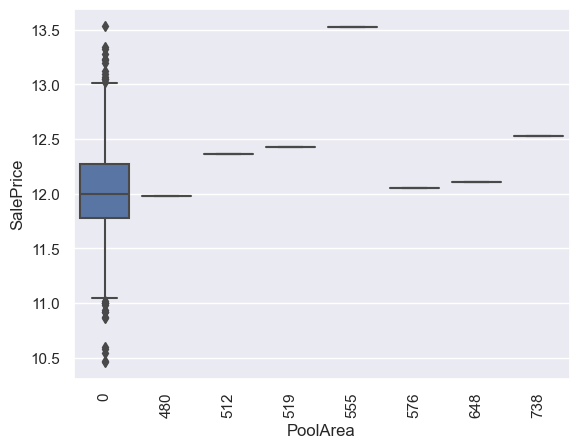

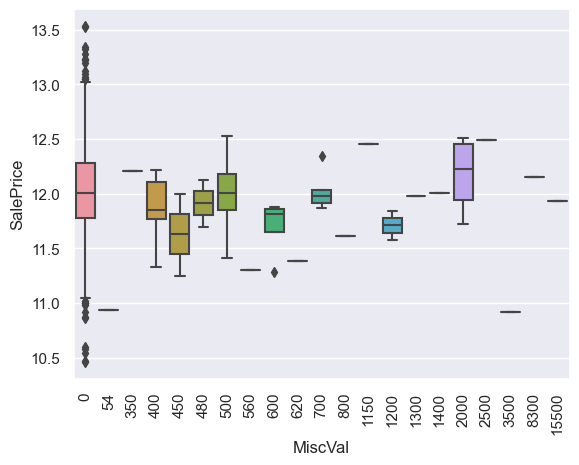

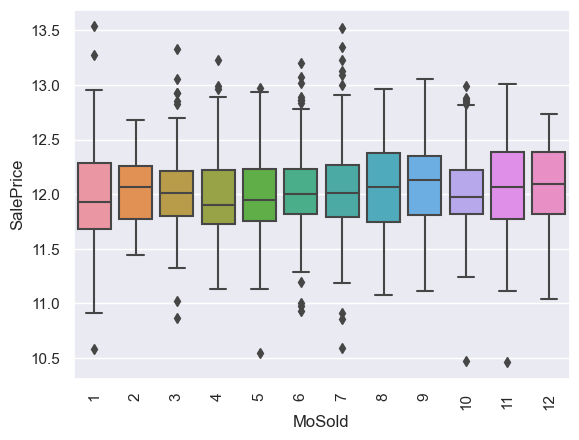

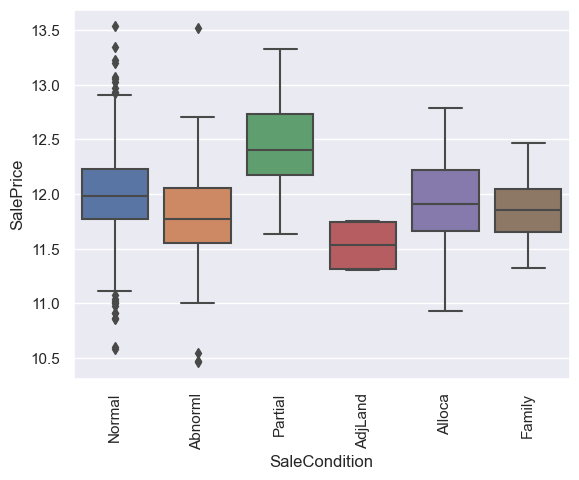

In [204]:
#Now we will check the effect of variable on dependent variable i.e. SalePrice

plt.figure(figsize=(15,10))
for cat in cat_cols:
    sns.boxplot(x = cat, y = 'SalePrice', data = data)
    plt.xticks(rotation=90)
    plt.show()

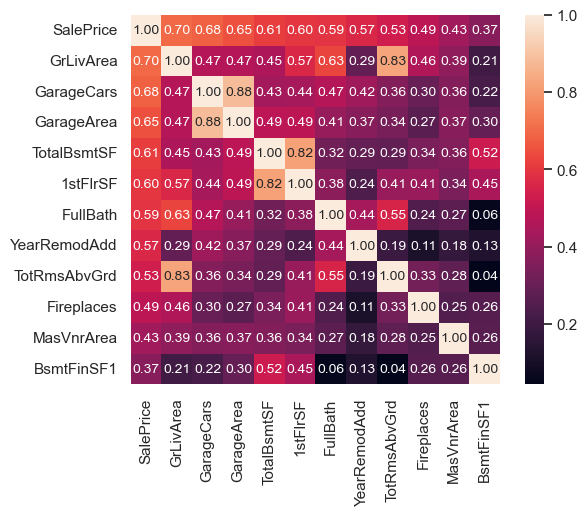

<Figure size 2500x1500 with 0 Axes>

In [205]:
#Displaying Saleprice correlation matrix
correlation_matx = data.corr()
k = 12 #number of variables for heatmap
selectedcol = correlation_matx.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[selectedcol].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=selectedcol.values, xticklabels=selectedcol.values)
plt.figure(figsize=(25,15))
plt.show()

In [206]:
#Update column list for categorical and contineous data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   object 
 11  OverallCond    1460 non-null   object 
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

In [207]:
new_cat = data.select_dtypes(include=['object']) 
new_num = data.select_dtypes(include=['int64','float64'])
print(new_cat.columns)
print(new_num.columns)

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')
Index(['Id', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'RealAge'],
      dtype='object')


In [208]:
cat_cols=list(new_cat.columns)
cont_cols=list(new_num.columns)

In [209]:
print(cat_cols)
print(cont_cols)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']
['Id', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'RealAge']


## ___________________________________________________________________________

## Step 4: Model Building And Evaluating Data

In [210]:
#We will import libraries needed for model building now
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import os
from sklearn.metrics import r2_score, mean_squared_error

In [211]:
#creating copy of original data
data_new=data

In [212]:
#Now we will try to create dummy varaibles(columns) for the categorical columns

new_cat = pd.get_dummies(new_cat,drop_first=True)  # Dummy variables
print(new_cat.shape)

(1460, 157)


In [213]:
new_cat.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Floating Village Residential,MSZoning_Residential High Density,MSZoning_Residential Low Density,MSZoning_Residential Medium Density,LotShape_Moderately Irregular,LotShape_Regular,LotShape_Slightly irregular,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_Brick Face,MasVnrType_None,MasVnrType_Stone,ExterQual_Excellent,ExterQual_Fair,ExterQual_Good,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fair,BsmtQual_Good,BsmtQual_None,BsmtQual_Typical,BsmtExposure_Good Exposure,BsmtExposure_Mimimum Exposure,BsmtExposure_No Exposure,BsmtExposure_None,BsmtFinType1_Average Rec Room,BsmtFinType1_Below Average Living Quarters,BsmtFinType1_Good Living Quarters,BsmtFinType1_Low Quality,BsmtFinType1_None,BsmtFinType1_Unfinshed,HeatingQC_Fair,HeatingQC_Good,HeatingQC_Poor,HeatingQC_Typical,KitchenQual_Fair,KitchenQual_Good,KitchenQual_Typical/Average,GarageType_Basement Garage,GarageType_Built-In,GarageType_Car Port,GarageType_Detached from home,GarageType_More than one type of garage,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_Rough Finished,GarageFinish_Unfinished,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0

In [214]:
# concat dummy variables with main dataset
data_new = pd.concat([data_new, new_cat], axis=1) 

In [215]:
data_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleCondition,SalePrice,RealAge,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Floating Village Residential,MSZoning_Residential High Density,MSZoning_Residential Low Density,MSZoning_Residential Medium Density,LotShape_Moderately Irregular,LotShape_Regular,LotShape_Slightly irregular,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_Brick Face,MasVnrType_None,MasVnrType_Stone,ExterQual_Excellent,ExterQual_Fair,ExterQual_Good,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fair,BsmtQual_Good,BsmtQual_None,BsmtQual_Typical,BsmtExposure_Good Exposure,BsmtExposure_Mimimum Exposure,BsmtExposure_No Exposure,BsmtExposure_None,BsmtFinType1_Average Rec Room,BsmtFinType1_Below Average Living Quarters,BsmtFinType1_Good Living Quarters,BsmtFinType1_Low Quality,BsmtFinType1_None,BsmtFinType1_Unfinshed,HeatingQC_Fair,HeatingQC_Good,HeatingQC_Poor,HeatingQC_Typical,KitchenQual_Fair,KitchenQual_Good,KitchenQual_Typical/Average,GarageType_Basement Garage,GarageType_Built-In,GarageType_Car Port,GarageType_Detached from home,GarageType_More than one type of garage,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_Rough Finished,GarageFinish_U

In [216]:
#Now we will remove columns as dummy variables are already formed

data_new.drop(cat_cols,axis=1,inplace=True) 
data_new.drop('Id',axis=1,inplace=True) 

In [217]:
data_new.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,RealAge,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Floating Village Residential,MSZoning_Residential High Density,MSZoning_Residential Low Density,MSZoning_Residential Medium Density,LotShape_Moderately Irregular,LotShape_Regular,LotShape_Slightly irregular,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_Brick Face,MasVnrType_None,MasVnrType_Stone,ExterQual_Excellent,ExterQual_Fair,ExterQual_Good,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fair,BsmtQual_Good,BsmtQual_None,BsmtQual_Typical,BsmtExposure_Good Exposure,BsmtExposure_Mimimum Exposure,BsmtExposure_No Exposure,BsmtExposure_None,BsmtFinType1_Average Rec Room,BsmtFinType1_Below Average Living Quarters,BsmtFinType1_Good Living Quarters,BsmtFinType1_Low Quality,BsmtFinType1_None,BsmtFinType1_Unfinshed,HeatingQC_Fair,HeatingQC_Good,HeatingQC_Poor,HeatingQC_Typical,KitchenQual_Fair,KitchenQual_Good,KitchenQual_Typical/Average,GarageType_Basement Garage,GarageType_Built-In,GarageType_Car Port,GarageType_Detached from home,GarageType_More than one type of garage,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_Rough Finished,GarageFinish_Unfinished,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.00,8450,2003,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,12.25,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,

In [218]:
# Put feature variable to X 

X = data_new.drop(['SalePrice'], axis=1)
X.head()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,RealAge,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Floating Village Residential,MSZoning_Residential High Density,MSZoning_Residential Low Density,MSZoning_Residential Medium Density,LotShape_Moderately Irregular,LotShape_Regular,LotShape_Slightly irregular,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_Brick Face,MasVnrType_None,MasVnrType_Stone,ExterQual_Excellent,ExterQual_Fair,ExterQual_Good,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fair,BsmtQual_Good,BsmtQual_None,BsmtQual_Typical,BsmtExposure_Good Exposure,BsmtExposure_Mimimum Exposure,BsmtExposure_No Exposure,BsmtExposure_None,BsmtFinType1_Average Rec Room,BsmtFinType1_Below Average Living Quarters,BsmtFinType1_Good Living Quarters,BsmtFinType1_Low Quality,BsmtFinType1_None,BsmtFinType1_Unfinshed,HeatingQC_Fair,HeatingQC_Good,HeatingQC_Poor,HeatingQC_Typical,KitchenQual_Fair,KitchenQual_Good,KitchenQual_Typical/Average,GarageType_Basement Garage,GarageType_Built-In,GarageType_Car Port,GarageType_Detached from home,GarageType_More than one type of garage,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_Rough Finished,GarageFinish_Unfinished,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.00,8450,2003,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,

In [219]:
# Put response variable to y

y = data_new['SalePrice']
y.head()

0   12.25
1   12.11
2   12.32
3   11.85
4   12.43
Name: SalePrice, dtype: float64

In [220]:
 #dividing the data into training and test sub section
 X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [221]:
## View dimensions of train data
print(X_train.shape)
print(y_train.shape)

(1021, 188)
(1021,)


In [222]:
## View dimensions of test data
print(X_test.shape)
print(y_test.shape)

(438, 188)
(438,)


#### Scaling numerical columns

In [223]:
## Create a scaling instance
scaler = StandardScaler()
final_cont_cols=['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                 'MiscVal', 'MoSold', 'RealAge']


## Scale the numerical columns 
X_train[final_cont_cols] = scaler.fit_transform(X_train[final_cont_cols])
X_test[final_cont_cols] = scaler.transform(X_test[final_cont_cols])

## ___________________________________________________________________________

- Ridge and Lasso Regression

### Model 1 : Ridge Regression


In [224]:
#First we will create a common function that can be used to show all the needed matrix

def ShowAllMetrics(y_train, y_train_pred, y_test, y_test_pred):
    
    metrics =[]
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metrics.append(r2_score(y_train, y_train_pred))
    metrics.append(r2_score(y_test, y_pred))
        
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    rss_test = np.sum(np.square(y_test - y_pred))
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    metrics.append(rss_train)
    metrics.append(rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    metrics.append(mse_train)
    metrics.append(mse_test)

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    rmse_test = mse_test**0.5
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test)
    metrics.append(rmse_train)
    metrics.append(rmse_test)
    
    return metrics

In [228]:
## Now to create a Ridge Regression model 

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [229]:
# Create a ridge regreesion instance with optimum value alpha=10
ridge = Ridge(alpha=10)

# Fit the model with training data
ridge.fit(X_train, y_train)

## View the coefficients values
ridge.coef_

array([-1.00668406e-02,  1.55898445e-02,  2.77173299e-02,  1.45677102e-03,
        8.67067403e-04,  1.85941696e-03,  9.80669344e-03,  1.11529648e-02,
        2.86800341e-02,  4.97005493e-02, -1.86155208e-03,  6.19524953e-02,
        2.64494318e-02,  4.92532526e-03,  2.92676254e-02,  1.68605412e-02,
        4.99107969e-03, -2.75675618e-02,  1.83826954e-02,  2.50771213e-02,
        4.21965456e-02,  4.14439906e-03,  1.35760671e-02, -2.21919419e-03,
        1.01179568e-02,  6.07966081e-03,  1.16940465e-02, -1.37047824e-02,
       -1.25077554e-03,  5.96406153e-04, -5.41397523e-02,  1.63466002e-02,
       -6.81229738e-02,  3.98635111e-02,  1.54372055e-04,  5.98791799e-05,
        2.28135442e-03,  4.00561001e-02,  4.35481300e-02, -2.73324576e-02,
       -6.08442929e-02,  2.05565475e-02, -2.83242630e-02,  1.88146408e-02,
        5.46424170e-03,  6.54768043e-02,  4.77901536e-02,  6.54153433e-02,
        1.92702640e-02,  3.18410686e-02,  2.41943607e-02,  1.56157548e-02,
        3.71344054e-02, -

In [230]:
## Make the predictions
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [231]:
## Check metrics result with the common function we created
ridge_metrics=ShowAllMetrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.87
RSS (Train) = 14.15
RSS (Test) = 9.02
MSE (Train) = 0.01
MSE (Test) = 0.02
RMSE (Train) = 0.12
RMSE (Test) = 0.14


In [232]:
## Create a dataframe view for the ridge cross validation results
ridge_results= pd.DataFrame(model_cv.cv_results_)
ridge_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.02,0.00,0.01,0.00,0.00,{'alpha': 0.0001},0.87,0.77,0.83,0.87,0.89,0.84,0.04,24,0.93,0.94,0.94,0.93,0.92,0.93,0.01
1,0.02,0.01,0.01,0.01,0.00,{'alpha': 0.001},0.87,0.77,0.83,0.87,0.89,0.84,0.04,23,0.93,0.94,0.94,0.93,0.92,0.93,0.01
2,0.02,0.01,0.00,0.01,0.01,{'alpha': 0.01},0.87,0.77,0.83,0.87,0.89,0.84,0.04,22,0.93,0.94,0.94,0.93,0.92,0.93,0.01
3,0.02,0.01,0.01,0.01,0.05,{'alpha': 0.05},0.87,0.77,0.83,0.87,0.89,0.85,0.04,20,0.93,0.94,0.94,0.93,0.92,0.93,0.01
4,0.02,0.01,0.01,0.01,0.10,{'alpha': 0.1},0.87,0.77,0.83,0.87,0.89,0.85,0.04,19,0.93,0.94,0.94,0.93,0.92,0.93,0.01
5,0.02,0.00,0.00,0.00,0.20,{'alpha': 0.2},0.87,0.77,0.83,0.88,0.90,0.85,0.05,18,0.93,0.94,0.94,0.93,0.92,0.93,0.01
6,0.02,0.01,0.00,0.01,0.30,{'alpha': 0.3},0.87,0.77,0.83,0.88,0.90,0.85,0.05,17,0.93,0.94,0.94,0.93,0.92,0.93,0.01
7,0.02,0.01,0.01,0.01,0.40,{'alpha': 0.4},0.88,0.77,0.83,0.88,0.90,0.85,0.05,15,0.93,0.94,0.94,0.92,0.92,0.93,0.01
8,0.01,0.01,0.01,0.01,0.50,{'alpha': 0.5},0.88,0.76,0.83,0.89,0.90,0.85,0.05,13,0.93,0.94,0.94,0.92,0.92,0.93,0.01
9,0.01,0.00,0.01,0.01,0.60,{'alpha': 0.6},0.88,0.76,0.83,0.89,0.90,0.85,0.05,11,0.93,0.94,0.94,0.92,0.92,0.93,0.01


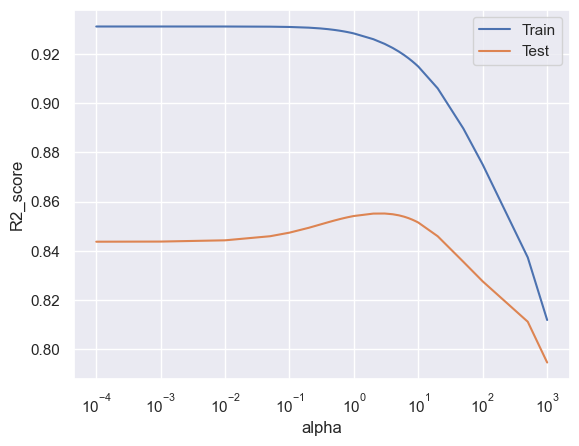

In [233]:
## Plotting R2 score and alpha values Graph

plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'], label='Train')
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

## Result : 

### ✔ We see here that as the value of alpha increases, error decrease in train data
### ✔ Also an initial increase is seens followed by decrease in test error as the value of alpha increases
### ✔ From graph we can say that the optimal value of alpha is 10.

## ___________________________________________________________________________

### Model 2 : Lasso Regression

In [234]:
##Creating Lasso regression model

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [235]:
## Optimum value of alpha
lassoCV.best_params_

{'alpha': 0.001}

In [236]:
##cross validation search result
lassoCV.cv_results_

{'mean_fit_time': array([0.34997864, 0.0781189 , 0.02812252, 0.02499828, 0.01874843,
        0.01874762, 0.02187266, 0.02187266, 0.02187438, 0.02499566,
        0.01874757, 0.02499695, 0.01874938, 0.01874399, 0.01875205,
        0.01874676, 0.01874866, 0.01874924, 0.02499757, 0.01874948,
        0.02187409, 0.01562428, 0.02812119, 0.01875062, 0.01874871,
        0.01874828, 0.01562448, 0.01562357]),
 'std_fit_time': array([1.19233891e-01, 2.17784638e-06, 1.16911884e-02, 7.65520065e-03,
        6.24995251e-03, 6.25095382e-03, 7.65461663e-03, 7.65344874e-03,
        7.65302062e-03, 1.87474014e-02, 6.25085865e-03, 1.25011574e-02,
        6.24697250e-03, 6.25240933e-03, 6.24921457e-03, 6.25043077e-03,
        6.24923737e-03, 6.24990487e-03, 1.24997378e-02, 6.24918965e-03,
        7.65451935e-03, 1.64491542e-06, 6.24928569e-03, 6.24849857e-03,
        6.25171804e-03, 6.25002422e-03, 1.86759529e-06, 1.07684992e-06]),
 'mean_score_time': array([0.01249814, 0.00624981, 0.01249795, 0.01562376, 

#### we got the optimum value of alpha as 0.001 which we will be using to build a lasso regression model

In [237]:
#Taking optimum value of alpha=0.001
lasso = Lasso(alpha=0.001)

#Fitting the model with the training data
lasso.fit(X_train, y_train)

##Checking the coefficients of lasso model
lasso.coef_

array([-6.98379109e-03,  1.36304401e-02,  3.33117817e-02,  1.53728482e-03,
        0.00000000e+00, -0.00000000e+00,  5.04290386e-03,  2.67999280e-02,
        0.00000000e+00,  5.82711284e-03, -6.25938433e-03,  1.10213748e-01,
        2.68824171e-02,  4.63230146e-03,  2.75557302e-02,  1.55383680e-02,
        1.55550634e-03, -2.93988731e-02,  1.85618448e-02,  2.54344271e-02,
        4.93593088e-02,  0.00000000e+00,  1.34508997e-02, -2.30534754e-04,
        9.29009487e-03,  5.30036374e-03,  1.21404267e-02, -1.54102388e-02,
       -0.00000000e+00,  0.00000000e+00, -5.44627436e-02,  0.00000000e+00,
       -8.22278265e-02,  3.44606928e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  1.72302918e-03, -1.58839711e-02,
       -7.14220361e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.71341287e-02,  0.00000000e+00,  4.45725201e-02,
       -0.00000000e+00,  0.00000000e+00,  2.52665989e-03, -0.00000000e+00,
        3.18291293e-02, -

In [238]:
##Now we will make predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [239]:
##Checking metrics using the common function 
lasso_metrics=ShowAllMetrics(y_train, y_train_pred, y_test, y_pred)

R-Squared (Train) = 0.90
R-Squared (Test) = 0.87
RSS (Train) = 16.01
RSS (Test) = 9.44
MSE (Train) = 0.02
MSE (Test) = 0.02
RMSE (Train) = 0.13
RMSE (Test) = 0.15


In [240]:
#Plotting R2 Score against different values of alpha for both train and test sets below

In [241]:
##dataframe set to store the ridge cross validation results
lasso_results= pd.DataFrame(lassoCV.cv_results_)
lasso_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.35,0.12,0.01,0.01,0.00,{'alpha': 0.0001},-0.10,-0.09,-0.10,-0.09,-0.09,-0.10,0.01,2,-0.08,-0.07,-0.07,-0.08,-0.08,-0.07,0.00
1,0.08,0.00,0.01,0.01,0.00,{'alpha': 0.001},-0.09,-0.10,-0.10,-0.09,-0.09,-0.09,0.01,1,-0.08,-0.08,-0.08,-0.08,-0.08,-0.08,0.00
2,0.03,0.01,0.01,0.01,0.01,{'alpha': 0.01},-0.11,-0.12,-0.12,-0.11,-0.12,-0.12,0.01,3,-0.11,-0.10,-0.11,-0.11,-0.11,-0.11,0.00
3,0.02,0.01,0.02,0.01,0.05,{'alpha': 0.05},-0.12,-0.14,-0.14,-0.14,-0.14,-0.14,0.01,4,-0.14,-0.12,-0.13,-0.14,-0.14,-0.13,0.00
4,0.02,0.01,0.01,0.01,0.10,{'alpha': 0.1},-0.16,-0.17,-0.16,-0.17,-0.18,-0.17,0.00,5,-0.17,-0.16,-0.17,-0.17,-0.17,-0.17,0.00
5,0.02,0.01,0.01,0.01,0.20,{'alpha': 0.2},-0.26,-0.26,-0.25,-0.25,-0.27,-0.26,0.01,6,-0.26,-0.26,-0.26,-0.26,-0.26,-0.26,0.00
6,0.02,0.01,0.01,0.01,0.30,{'alpha': 0.3},-0.31,-0.31,-0.31,-0.30,-0.32,-0.31,0.01,7,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,0.00
7,0.02,0.01,0.01,0.01,0.40,{'alpha': 0.4},-0.31,-0.31,-0.31,-0.30,-0.32,-0.31,0.01,7,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,0.00
8,0.02,0.01,0.02,0.02,0.50,{'alpha': 0.5},-0.31,-0.31,-0.31,-0.30,-0.32,-0.31,0.01,7,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,0.00
9,0.02,0.02,0.01,0.01,0.60,{'alpha': 0.6},-0.31,-0.31,-0.31,-0.30,-0.32,-0.31,0.01,7,-0.31,-0.31,-0.31,-0.31,-0.31,-0.31,0.00


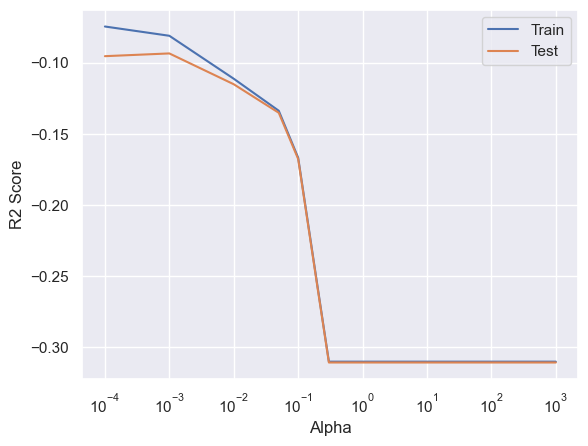

In [242]:
## Plotting R2 score vs alpha values
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'], label='Train')
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'], label='Test')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()

### ✔ From the graph we can see that ss the value of alpha increases, error goes down in both train and test data set. 
### ✔ However, we also notice that after a error value near about 0.05 the error becomes constant.

## Now we will compare the two model

In [243]:
## Setting float display options
pd.options.display.float_format = "{:,.2f}".format

# Creating a table which contain all the metrics
# the order of the metric label is created as per the function design .The order in which the value is appended.

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.91,0.90
R2 Score (Test),0.87,0.87
RSS (Train),14.15,16.01
RSS (Test),9.02,9.44
MSE (Train),0.01,0.02
MSE (Test),0.02,0.02
RMSE (Train),0.12,0.13
RMSE (Test),0.14,0.15


### ✔ The R2 score on test data is 0.87 for both Ridge Regression and Lasso models.

In [244]:
## Now we see the changes in coefficients after regularization

## First create empty datafame with all the independent variables as indices
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas

""
LotFrontage
LotArea
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF


In [245]:
## Now fill in the values of betas, one column for ridge coefficients and one for lasso coefficients
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [246]:
betas

,Ridge,Lasso
LotFrontage,-0.01,-0.01
LotArea,0.02,0.01
YearRemodAdd,0.03,0.03
MasVnrArea,0.00,0.00
BsmtFinSF1,0.00,0.00
BsmtFinSF2,0.00,-0.00
BsmtUnfSF,0.01,0.01
TotalBsmtSF,0.01,0.03
1stFlrSF,0.03,0.00
2ndFlrSF,0.05,0.01


## ✔ Features removed by Lasso

In [264]:
removed_feat=betas[betas['Lasso']==0].index
print("Features removed by Lasso : ",removed_feat.shape[0])
print(removed_feat)

Features removed by Lasso :  104
Index(['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', 'GarageArea', 'MiscVal',
       'MoSold', 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       ...
       'KitchenQual_Good', 'GarageType_Basement Garage', 'GarageType_Car Port',
       'GarageType_More than one type of garage', 'GarageType_No Garage',
       'GarageFinish_No Garage', 'GarageFinish_Rough Finished',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family'],
      dtype='object', length=104)


## ✔ Features selected by lasso

In [265]:
selected_feat=betas[betas['Lasso']!=0].index
print("Features selected by Lasso : ",selected_feat.shape[0])
print(selected_feat)

Features selected by Lasso :  84
Index(['LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'RealAge',
       'MSSubClass_1-STORY 1945 & OLDER',
       'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
       'MSSubClass_2-STORY 1945 & OLDER', 'MSSubClass_2-STORY 1946 & NEWER',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSZoning_Floating Village Residential',
       'MSZoning_Residential Low Density', 'LotShape_Regular',
       'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighb

## ___________________________________________________________________________

## ✔ We will check the top 10 features which is significant in the prediction of the value of house by both Ridge model and Lasso model

- First From Ridge Model

In [266]:
##Top 10 in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_Excellent                   0.13
OverallQual_Very Good                   0.10
Neighborhood_Crawfor                    0.10
Neighborhood_NridgHt                    0.09
Neighborhood_Somerst                    0.08
Neighborhood_NoRidge                    0.07
Exterior1st_BrkFace                     0.07
MSZoning_Floating Village Residential   0.07
MSZoning_Residential Low Density        0.07
GrLivArea                               0.06
Name: Ridge, dtype: float64

In [268]:
##Top 10 Based on inverse log (i.e. e to the power) of betas values
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_Excellent                   1.14
OverallQual_Very Good                   1.11
Neighborhood_Crawfor                    1.10
Neighborhood_NridgHt                    1.10
Neighborhood_Somerst                    1.08
Neighborhood_NoRidge                    1.07
Exterior1st_BrkFace                     1.07
MSZoning_Floating Village Residential   1.07
MSZoning_Residential Low Density        1.07
GrLivArea                               1.06
Name: Ridge, dtype: float64

- Then From Lasso Model

In [269]:
## Top 10 in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_Excellent        0.19
OverallQual_Very Good        0.12
Neighborhood_Crawfor         0.12
GrLivArea                    0.11
Neighborhood_NridgHt         0.09
Neighborhood_Somerst         0.08
BsmtExposure_Good Exposure   0.06
Neighborhood_NoRidge         0.05
Exterior1st_BrkFace          0.05
GarageCars                   0.05
Name: Lasso, dtype: float64

In [270]:
##Top 10 Based on inverse log (i.e. e to the power) of betas values
lasso_coeffs = np.exp(betas['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_Excellent        1.21
OverallQual_Very Good        1.13
Neighborhood_Crawfor         1.12
GrLivArea                    1.12
Neighborhood_NridgHt         1.10
Neighborhood_Somerst         1.09
BsmtExposure_Good Exposure   1.06
Neighborhood_NoRidge         1.06
Exterior1st_BrkFace          1.06
GarageCars                   1.05
Name: Lasso, dtype: float64

## ___________________________________________________________________________

## Conclusion

## ✔ The variables significant in predicting the price of a house are: -

- OverallQual_Excellent
- OverallQual_Very Good                  
- Neighborhood_Crawfor 
- Neighborhood_NridgHt
- Neighborhood_Somerst
- Neighborhood_NoRidge
- Exterior1st_BrkFace
- MSZoning_Floating Village Residential
- MSZoning_Residential Low Density
- GrLivArea
- BsmtExposure_Good Exposure
- GarageCars                   

## ✔ If the overall quality of material is Excellent and very good, the price of the house will increase 1.21 and 1.13 times

## ✔ If the house is located in Crawford, Northridge Heights , Somerset or Northridgey the price of the house is strongly expected to be more (by factor of 1.06 to 1.09)

## ✔ The price of the house is expected to increase if the exterior of the house is made from brick (BrkFace	Brick Face) (by factor of 1.06 to 1.07)

## ✔ If the house lies in Floating Village Residential or Residential Low Density zone then the price of the house is expected to increase ( by factor of 1.07)

## ✔ Optimal value of lambda for Ridge Regression = 10

## ✔ Optimal value of lambda for Lasso = 0.001

## ✔ Since here the main option was of Feature selection ,we can choose Lasso regression.